# Assignment 1: Diabetes Prediction using Perceptron and MLP

# 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, classification_report, roc_auc_score, confusion_matrix
from torch.utils.data import TensorDataset, DataLoader
import warnings

warnings.filterwarnings('ignore')


# 2. Data Loading and Exploration

In [2]:
# Load the dataset 
df = pd.read_csv("diabetes_scale.csv")
df

outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0         -1    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1          1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2         -1    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3          1    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4         -1    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   
..       ...          ...       ...            ...            ...       ...   
763        1     0.176471  0.015075       0.245902      -0.030303 -0.574468   
764        1    -0.764706  0.226131       0.147541      -0.454545 -1.000000   
765        1    -0.411765  0.216080       0.180328      -0.535354 -0.735225   
766       -1    -0.882353  0.266332      -0.016393      -1.000000 -1.000000   
767        1    -0.882353 -0.065327       0.147541      -0.373737 -1.000000   

          BMI  DiabetesPedigreeFunction       Age  
0    0.001490                 -0.531170 -0.033333  
1   -0.207153                 -0.766866 -0.666667  
2   -0.305514                 -0.492741 -0.633333  
3   -0.162444                 -0.923997 -1.000000  
4    0.284650                  0.887276 -0.600000  
..        ...                       ...       ...  
763 -0.019374                 -0.920581  0.400000  
764  0.096870                 -0.776260 -0.800000  
765 -0.219076                 -0.857387 -0.700000  
766 -0.102832                 -0.768574 -0.133333  
767 -0.093890                 -0.797609 -0.933333  

[768 rows x 9 columns]

In [3]:
df.head()

outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0       -1    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1        1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2       -1    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3        1    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4       -1    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   

        BMI  DiabetesPedigreeFunction       Age  
0  0.001490                 -0.531170 -0.033333  
1 -0.207153                 -0.766866 -0.666667  
2 -0.305514                 -0.492741 -0.633333  
3 -0.162444                 -0.923997 -1.000000  
4  0.284650                  0.887276 -0.600000

In [4]:
df.tail()

outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
763        1     0.176471  0.015075       0.245902      -0.030303 -0.574468   
764        1    -0.764706  0.226131       0.147541      -0.454545 -1.000000   
765        1    -0.411765  0.216080       0.180328      -0.535354 -0.735225   
766       -1    -0.882353  0.266332      -0.016393      -1.000000 -1.000000   
767        1    -0.882353 -0.065327       0.147541      -0.373737 -1.000000   

          BMI  DiabetesPedigreeFunction       Age  
763 -0.019374                 -0.920581  0.400000  
764  0.096870                 -0.776260 -0.800000  
765 -0.219076                 -0.857387 -0.700000  
766 -0.102832                 -0.768574 -0.133333  
767 -0.093890                 -0.797609 -0.933333

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [6]:
# numerical feature descriptive statistics
df.describe().T

count      mean       std  min       25%       50%  \
outcome                   768.0  0.302083  0.953903 -1.0 -1.000000  1.000000   
Pregnancies               768.0 -0.547641  0.396421 -1.0 -0.882353 -0.647059   
Glucose                   768.0  0.215020  0.321333 -1.0 -0.005025  0.175879   
BloodPressure             768.0  0.131574  0.319896 -1.0  0.016393  0.180328   
SkinThickness             768.0 -0.585122  0.322267 -1.0 -1.000000 -0.535354   
Insulin                   768.0 -0.810410  0.273036 -1.0 -1.000000 -0.919622   
BMI                       768.0 -0.047279  0.237041 -1.0 -0.186289 -0.046200   
DiabetesPedigreeFunction  768.0 -0.662247  0.284229 -1.0 -0.858241 -0.746798   
Age                       759.0 -0.599166  0.388652 -1.0 -0.900000 -0.733333   

                               75%  max  
outcome                   1.000000  1.0  
Pregnancies              -0.294118  1.0  
Glucose                   0.409547  1.0  
BloodPressure             0.311475  1.0  
SkinThickness            -0.353535  1.0  
Insulin                  -0.696809  1.0  
BMI                       0.090909  1.0  
DiabetesPedigreeFunction -0.530743  1.0  
Age                      -0.366667  1.0

In [7]:
df.shape

(768, 9)

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print(df)

     outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0         -1    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1          1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2         -1    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3          1    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4         -1    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   
..       ...          ...       ...            ...            ...       ...   
763        1     0.176471  0.015075       0.245902      -0.030303 -0.574468   
764        1    -0.764706  0.226131       0.147541      -0.454545 -1.000000   
765        1    -0.411765  0.216080       0.180328      -0.535354 -0.735225   
766       -1    -0.882353  0.266332      -0.016393      -1.000000 -1.000000   
767        1    -0.882353 -0.065327       0.147541      -0.373737 -1.000000   

          BMI  DiabetesPedigreeFunction       Age  

In [9]:
# You may now utilize the drop_duplicates function.
df.drop_duplicates(inplace=True)

# Check the updated DataFrame
print(df)

     outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0         -1    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1          1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2         -1    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3          1    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4         -1    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   
..       ...          ...       ...            ...            ...       ...   
763        1     0.176471  0.015075       0.245902      -0.030303 -0.574468   
764        1    -0.764706  0.226131       0.147541      -0.454545 -1.000000   
765        1    -0.411765  0.216080       0.180328      -0.535354 -0.735225   
766       -1    -0.882353  0.266332      -0.016393      -1.000000 -1.000000   
767        1    -0.882353 -0.065327       0.147541      -0.373737 -1.000000   

          BMI  DiabetesPedigreeFunction       Age  

In [10]:
# Present fundamental statistics
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
          outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean     0.302083    -0.547641    0.215020       0.131574      -0.585122   
std      0.953903     0.396421    0.321333       0.319896       0.322267   
min     -1.000000    -1.000000   -1.000000      -1.000000      -1.000000   
25%     -1.000000    -0.882353   -0.005025       0.016393      -1.000000   
50%      1.000000    -0.647059    0.175879       0.180328      -0.535354   
75%      1.000000    -0.294118    0.409547       0.311475      -0.353535   
max      1.000000     1.000000    1.000000       1.000000       1.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  759.000000  
mean    -0.810410   -0.047279                 -0.662247   -0.599166  
std      0.273036    0.237041                  0.284229    0.388652  
min     -1.00000

In [11]:
print(df.columns)

Index(['outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [12]:
print(df['outcome'].value_counts()) 
print(df['Pregnancies'].value_counts()) 

 1    500
-1    268
Name: outcome, dtype: int64
-0.882353    135
-1.000000    111
-0.764706    103
-0.647059     75
-0.529412     68
-0.411765     57
-0.294118     50
-0.176471     45
-0.058824     38
 0.058824     28
 0.176471     24
 0.294118     11
 0.529412     10
 0.411765      9
 0.647059      2
 0.764706      1
 1.000000      1
Name: Pregnancies, dtype: int64


In [13]:
# Filter rows (within a certain range) where 'Pregnancies' is nearly equal to 0.
df_filtered = df[(df['Pregnancies'] > -0.1) & (df['Pregnancies'] < 0.1)]
print(df_filtered[['Age', 'Glucose']].describe())

             Age    Glucose
count  66.000000  66.000000
mean   -0.204546   0.322522
std     0.350135   0.351977
min    -0.966667  -0.427136
25%    -0.425000   0.077889
50%    -0.266667   0.251256
75%    -0.033333   0.567839
max     1.000000   0.979899


In [14]:
df['outcome']=np.where(df['outcome']==1,"Diabetic","No Diabetic")

In [15]:
df.head()

outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0  No Diabetic    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1     Diabetic    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2  No Diabetic    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3     Diabetic    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4  No Diabetic    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   

        BMI  DiabetesPedigreeFunction       Age  
0  0.001490                 -0.531170 -0.033333  
1 -0.207153                 -0.766866 -0.666667  
2 -0.305514                 -0.492741 -0.633333  
3 -0.162444                 -0.923997 -1.000000  
4  0.284650                  0.887276 -0.600000

# EDA

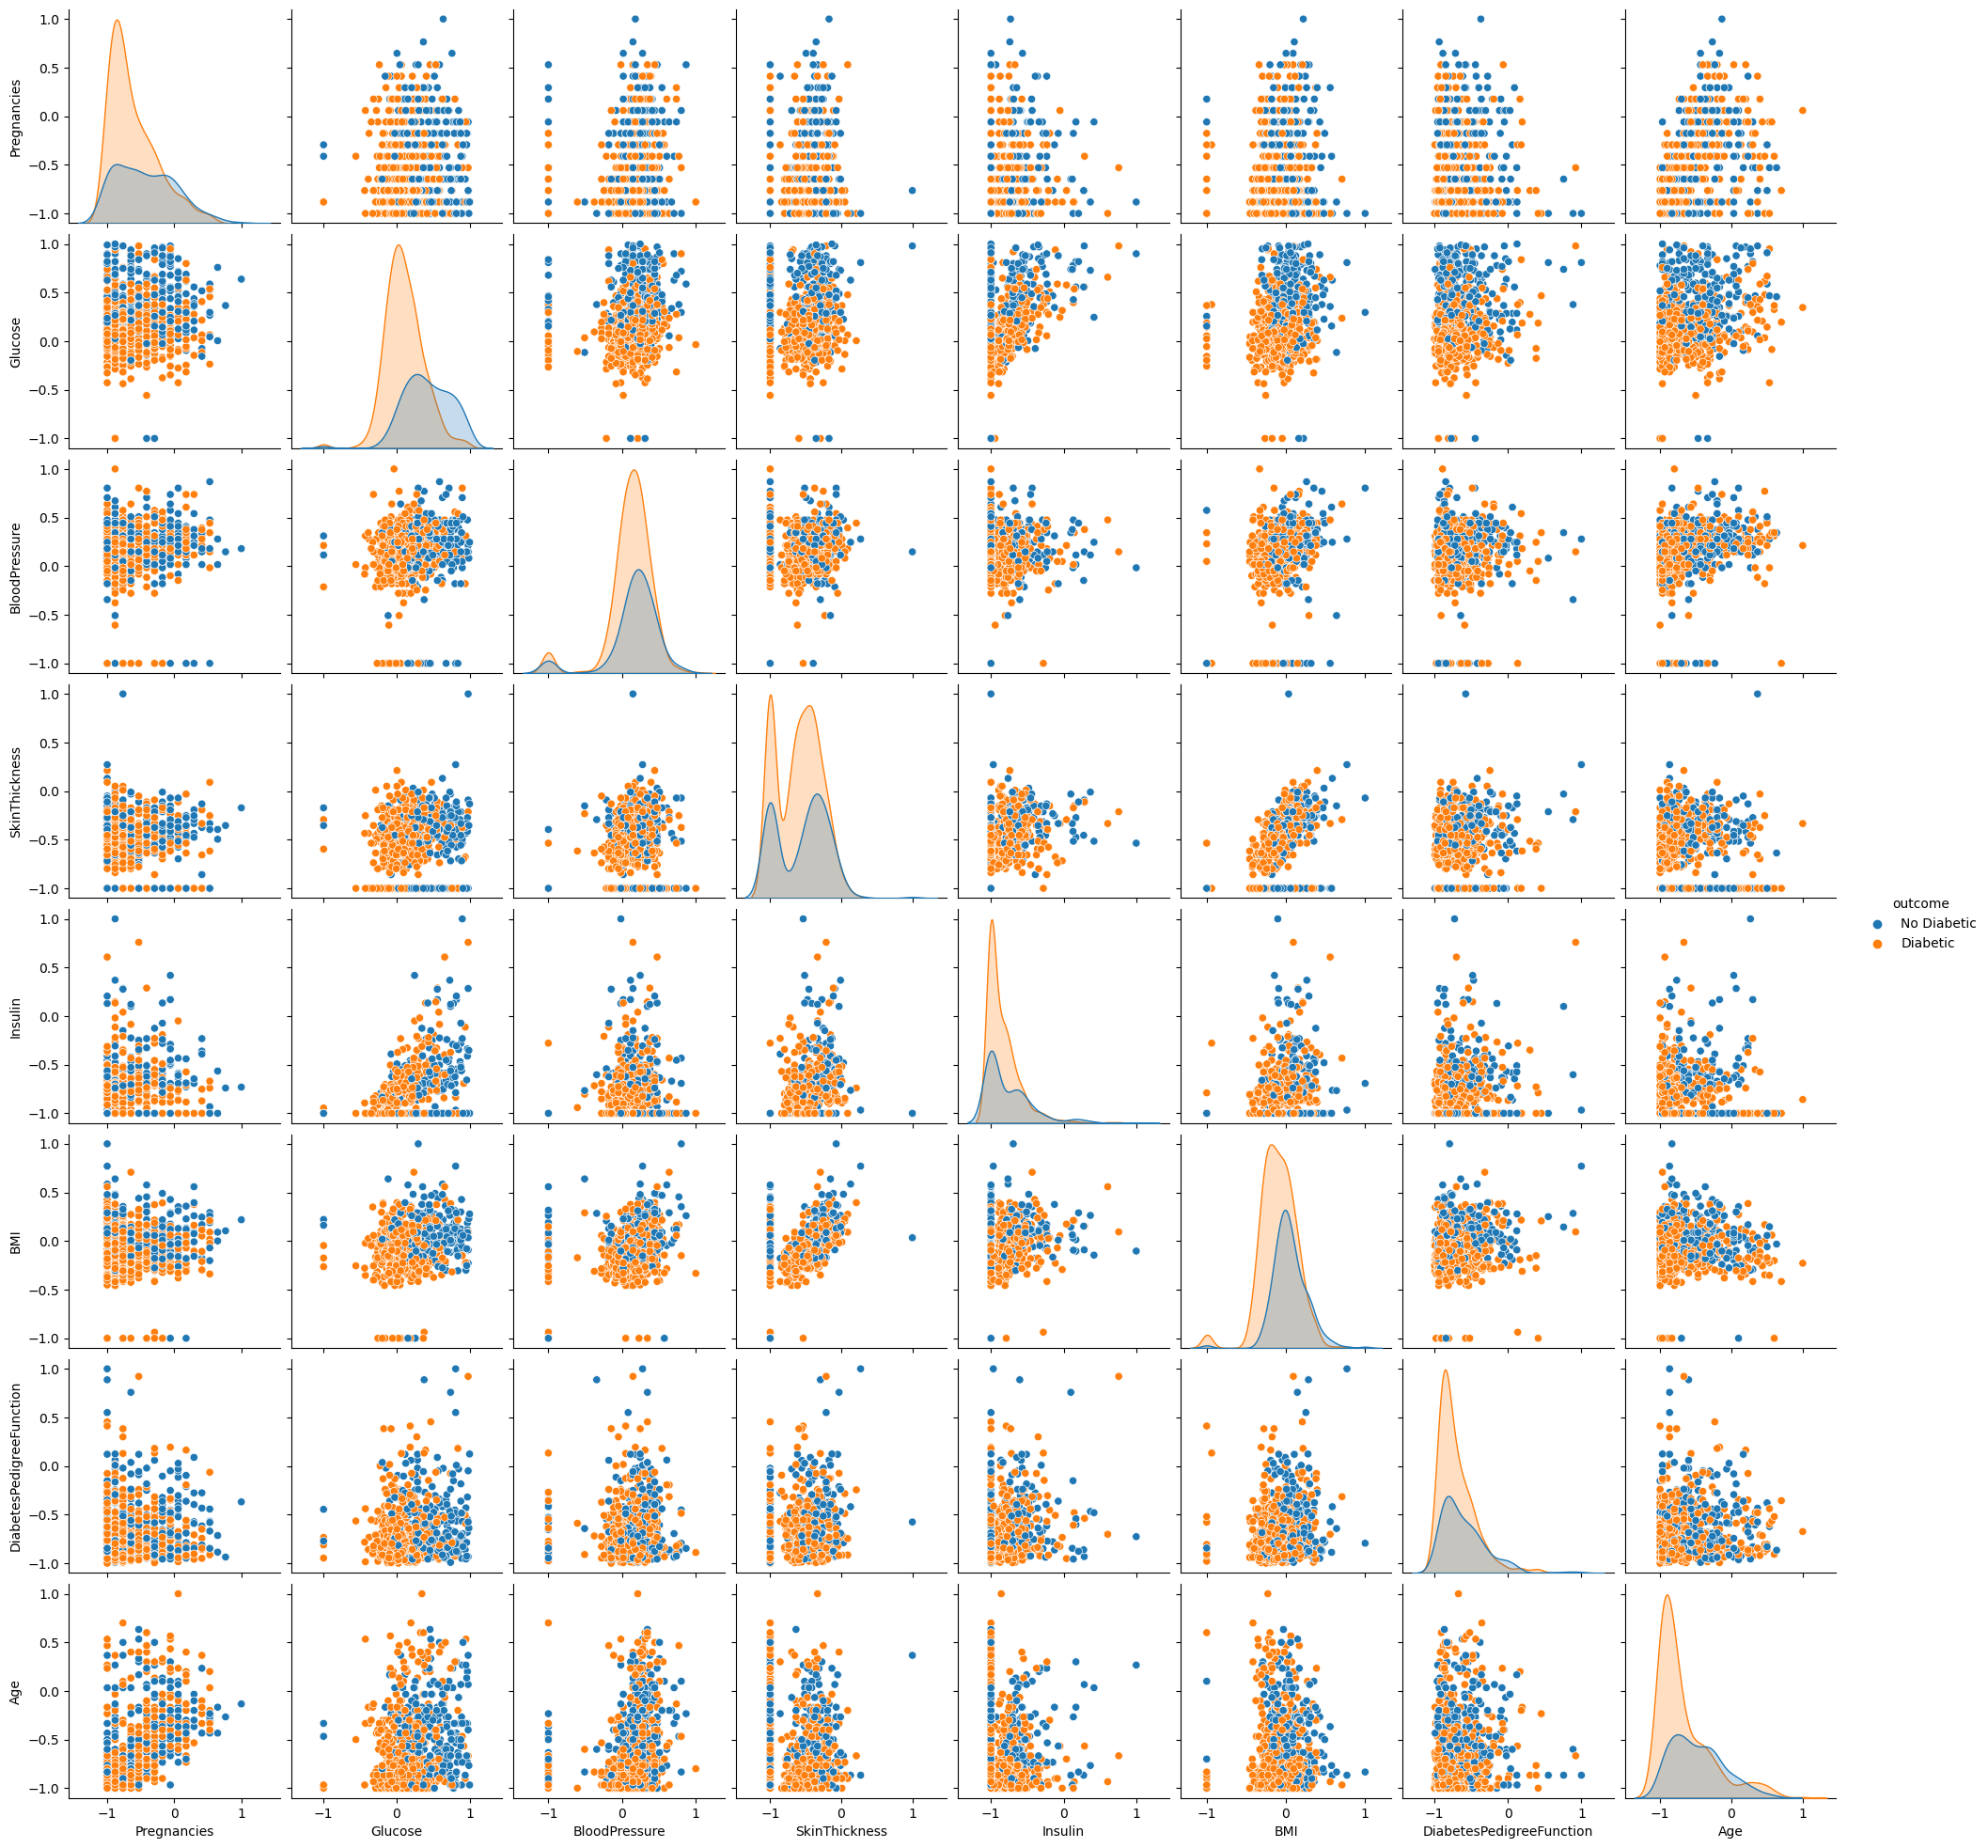

In [16]:
sns.pairplot(df,hue="outcome")

In [17]:
color = ["#9C1A15", "#159d5e", "#15999d", "#15559d", "#999d15", "#5e159d", "#159d5e", "#9d5e15"]

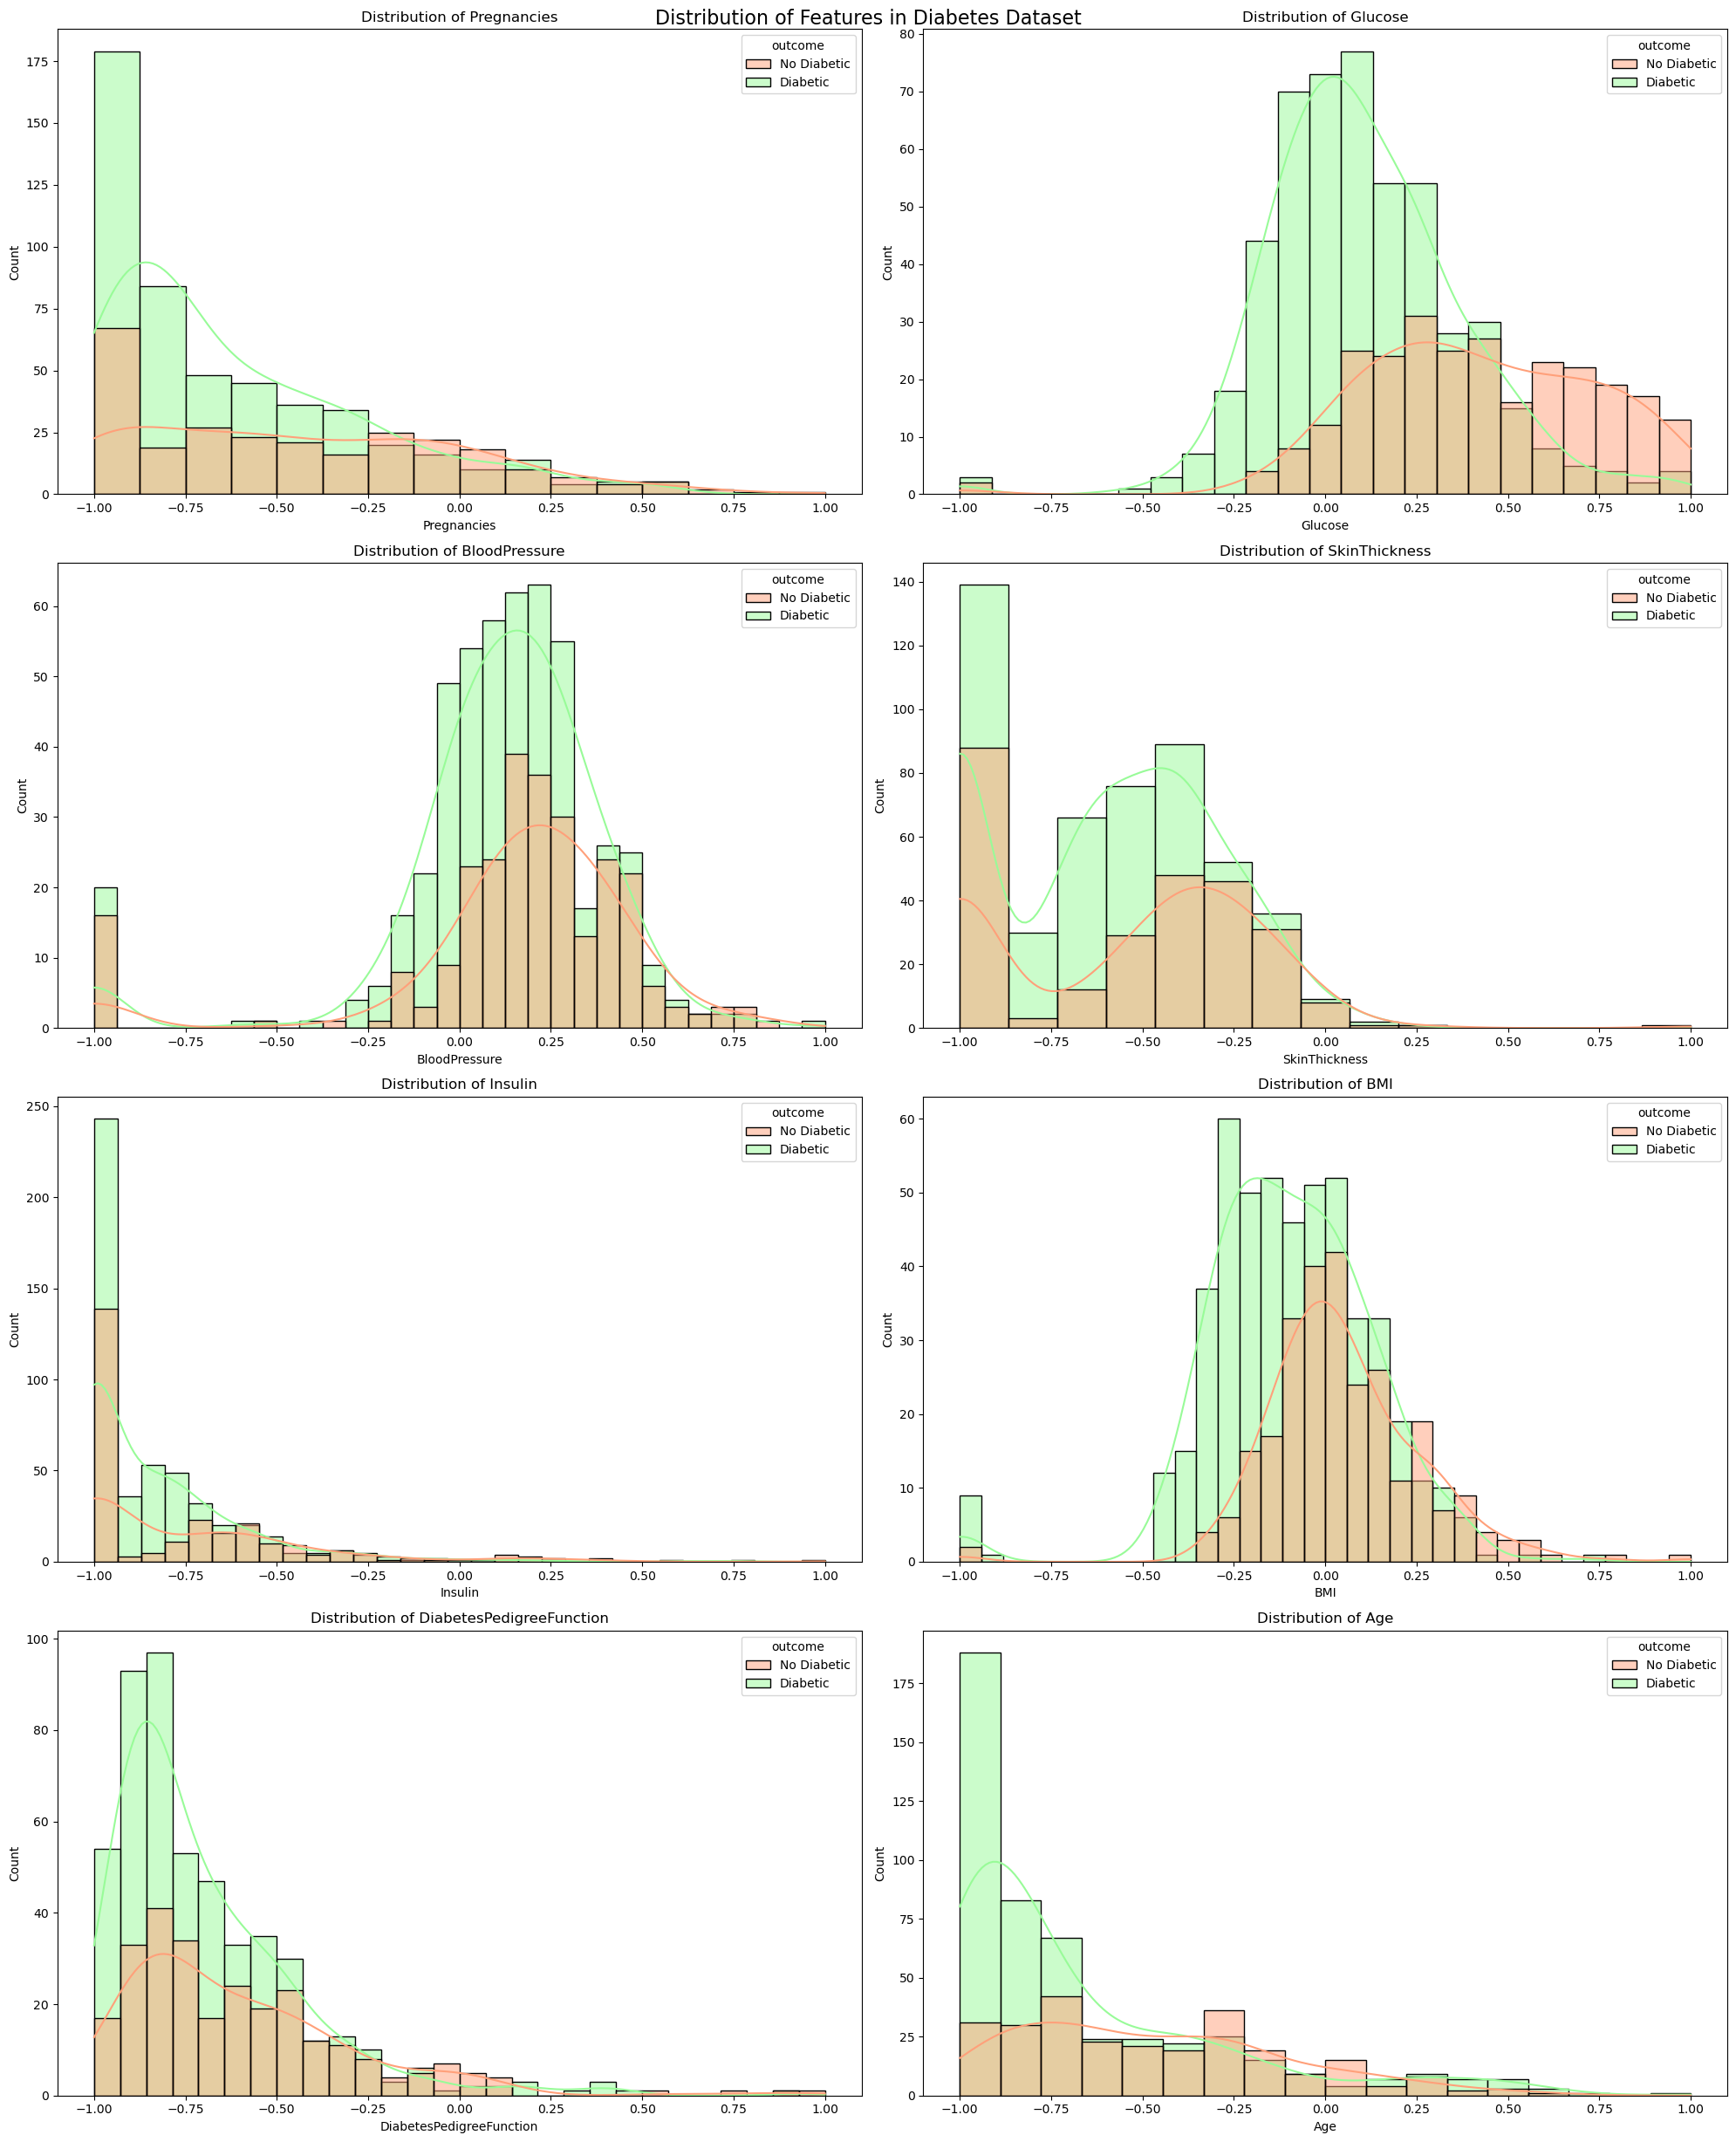

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_columns = [col for col in df.columns if col != 'outcome']

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
fig.suptitle('Distribution of Features in Diabetes Dataset', fontsize=16)

# Plot each feature
for ax, feature in zip(axes.flatten(), feature_columns):
    sns.histplot(data=df, x=feature, hue='outcome', kde=True, palette=['#FFA07A', '#98FB98'], ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

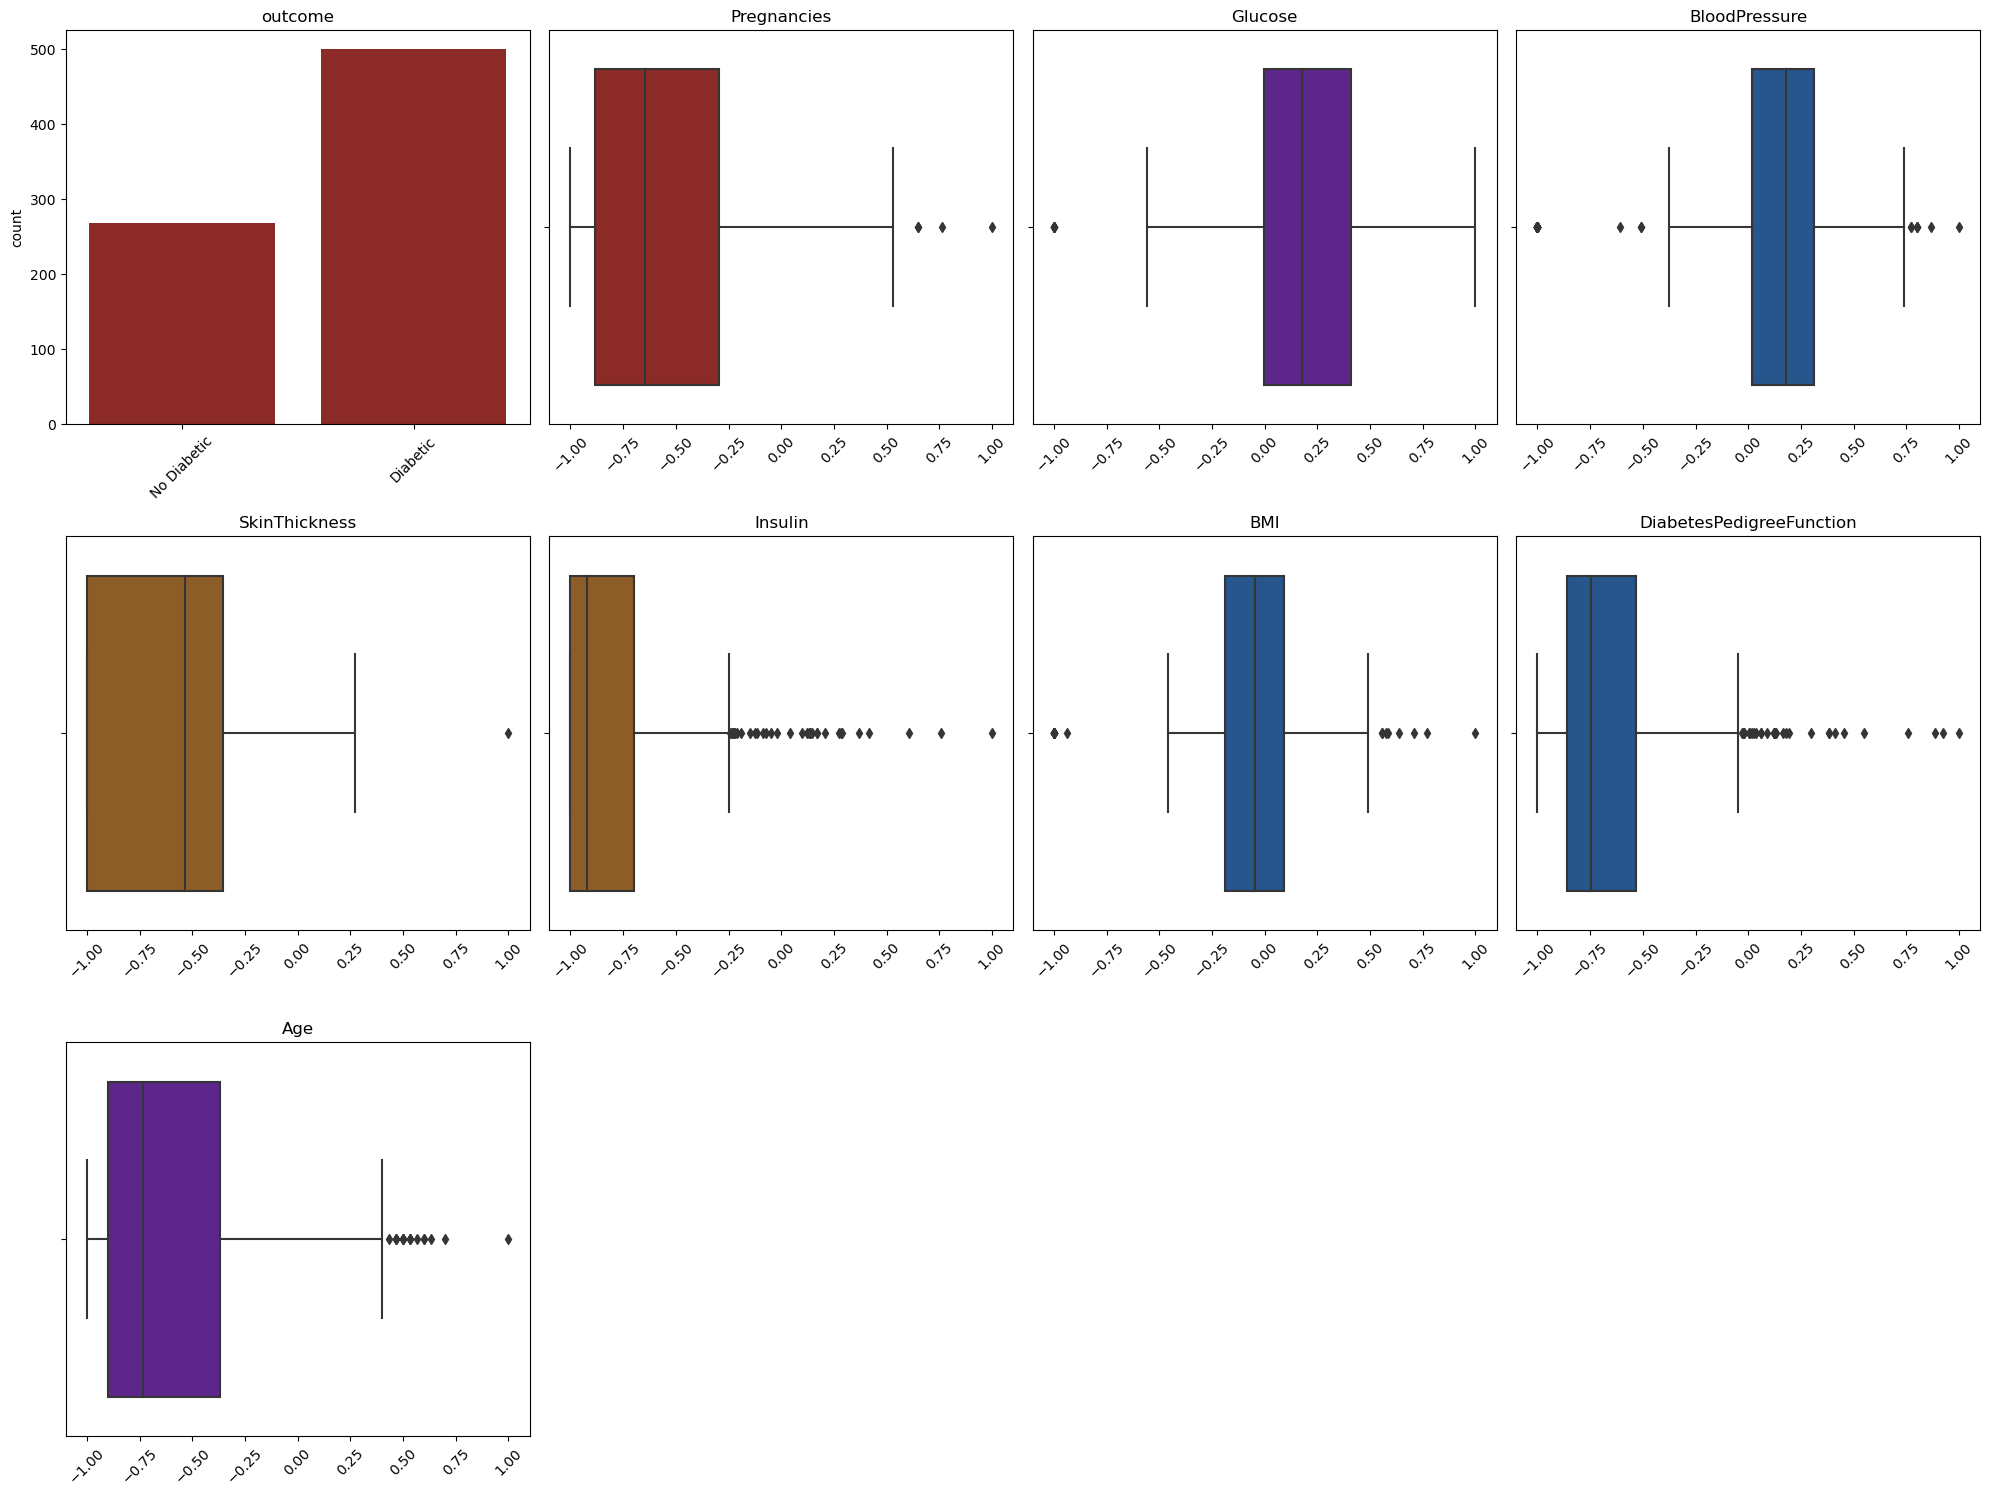

In [19]:
# Boxplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

def plot_variable(data, column, ax, color):
    if pd.api.types.is_numeric_dtype(data[column]):
        sns.boxplot(x=column, data=data, ax=ax, color=color)
    else:
        sns.countplot(x=column, data=data, ax=ax, color=color)
    ax.set_xlabel("")
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)

color2 = ["#9C1A15", "#159d5e", "#15999d", "#15559d", "#999d15", "#5e159d", "#159d5e", "#9d5e15"]

columns = df.columns.tolist()

n_rows = (len(columns) + 3) // 4  

f, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
axes = axes.flatten()  

for i, col in enumerate(columns):
    plot_variable(df, col, axes[i], random.choice(color2))

for j in range(i+1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()

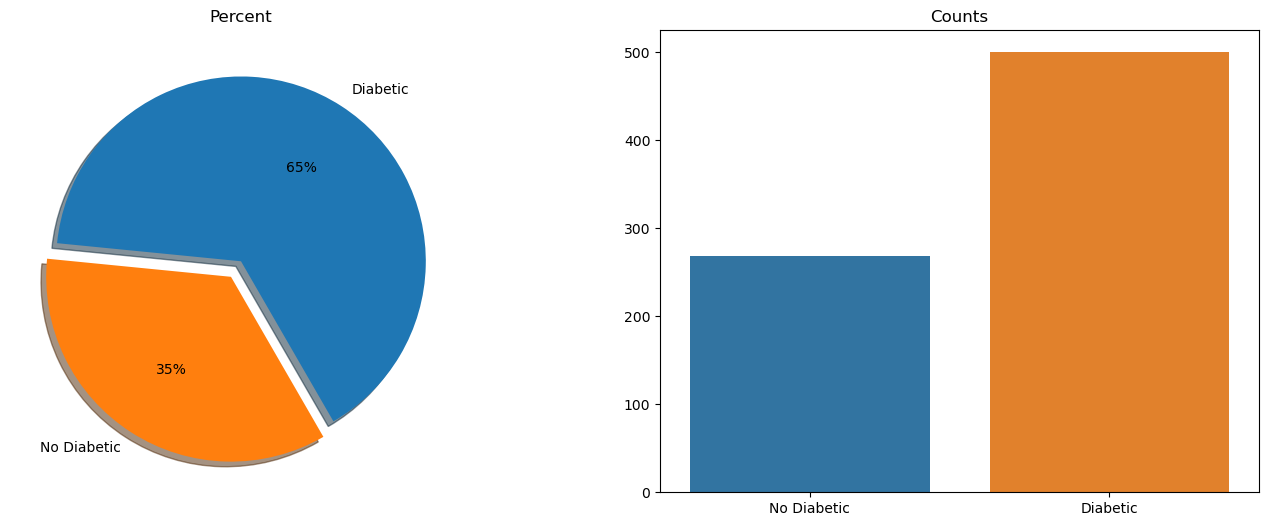

In [20]:
f, ax = plt.subplots(1,2,figsize=(17,6))

df["outcome"].value_counts().plot.pie(autopct="%1.f%%", shadow=True, startangle=300, explode=[0, 0.1], ax=ax[0])
ax[0].set_title("Percent")
ax[0].set_ylabel('')

sns.countplot(data=df, x="outcome", ax=ax[1])
ax[1].set_title("Counts")
ax[1].set_ylabel("")
ax[1].set_xlabel("")

plt.show()

<Axes: xlabel='Pregnancies', ylabel='Count'>

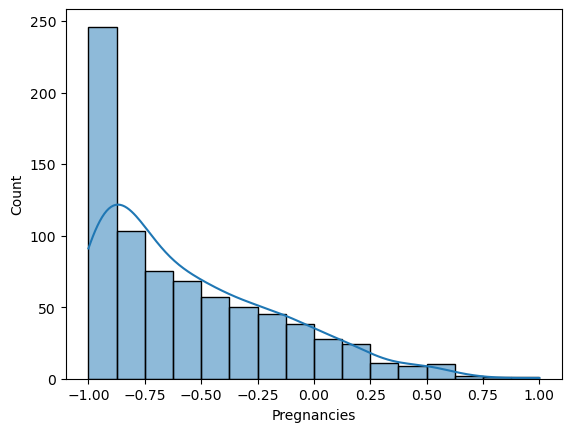

In [21]:
sns.histplot(data=df, x='Pregnancies',kde=True)

<Axes: xlabel='Glucose', ylabel='Count'>

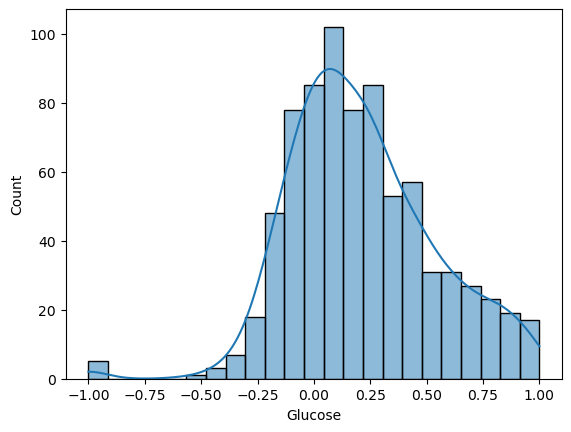

In [22]:
sns.histplot(data=df, x='Glucose',kde=True)

<Axes: xlabel='BloodPressure', ylabel='Count'>

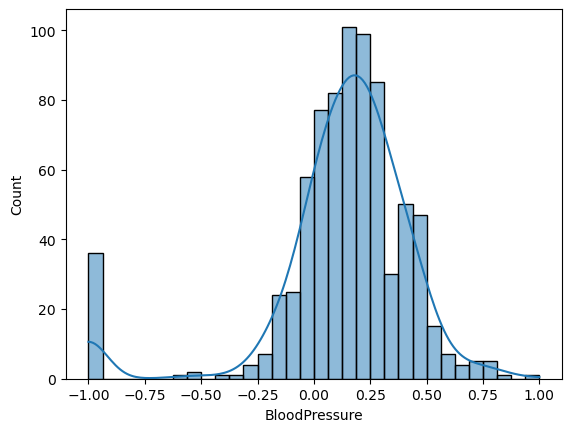

In [23]:
sns.histplot(data=df, x='BloodPressure',kde=True)

<Axes: xlabel='BMI', ylabel='Count'>

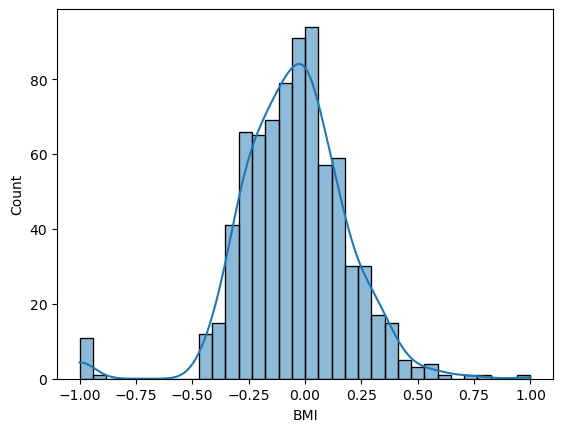

In [24]:
sns.histplot(data=df, x='BMI',kde=True)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

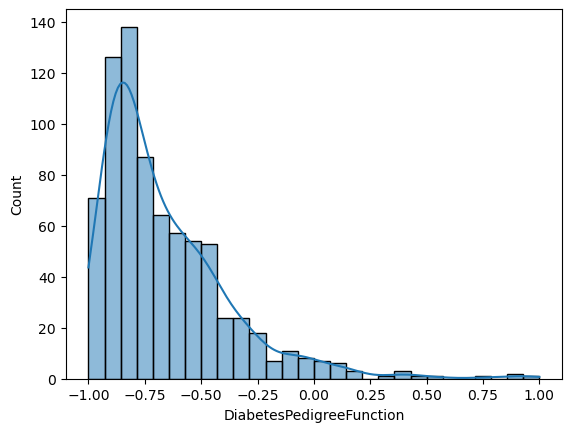

In [25]:
sns.histplot(data=df, x='DiabetesPedigreeFunction',kde=True)

<Axes: xlabel='Age', ylabel='Count'>

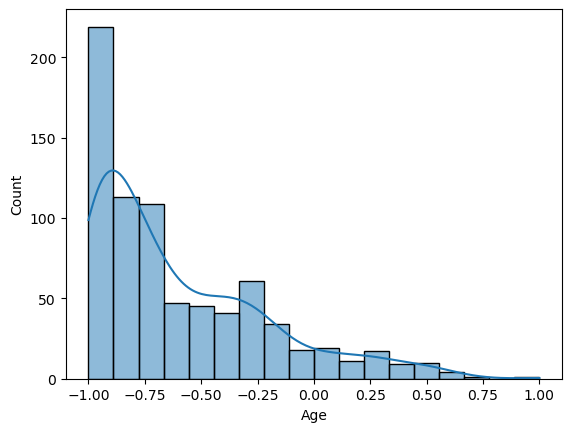

In [26]:
sns.histplot(data=df, x='Age',kde=True)

In [27]:
print(df.dtypes)


outcome                      object
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object


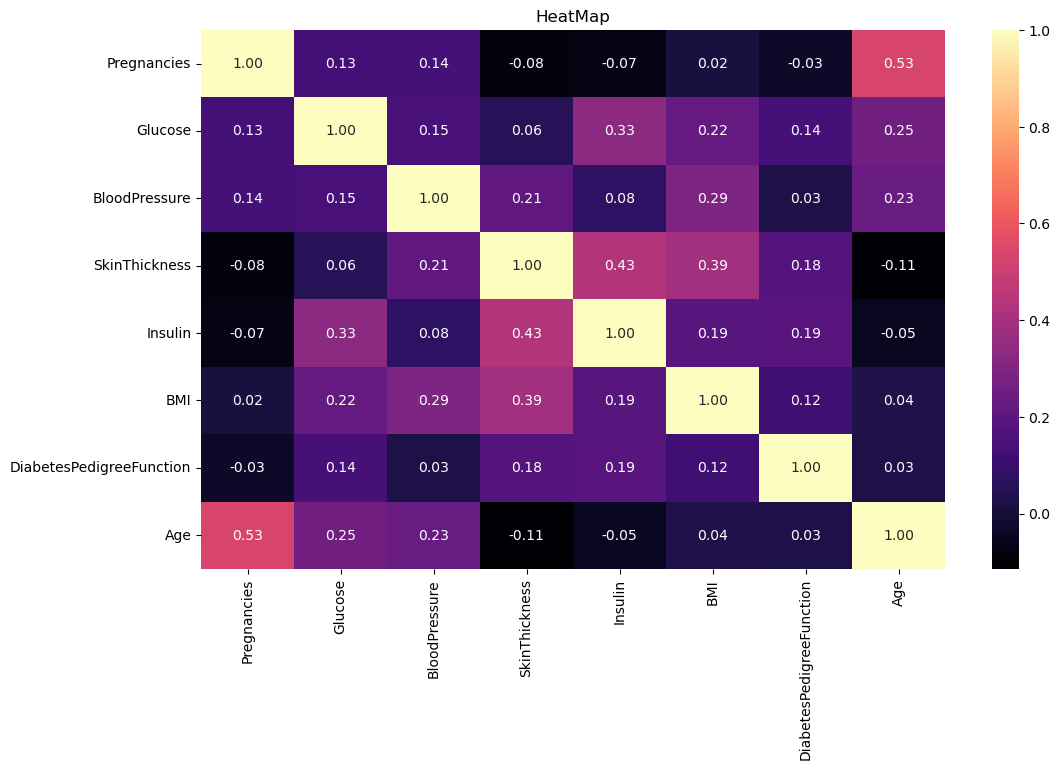

In [28]:
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="magma", ax=ax)
ax.set_title("HeatMap")
plt.show()

# 3. Data Preprocessing

# 3.1 Check for Missing Values and Duplicates

In [29]:
# 1. Look for any missing values.
print("Missing values:")
print(df.isnull().sum())

Missing values:
outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         9
dtype: int64


In [30]:
# Use the median to fill in the missing values for "Age."
median_age = df['Age'].median()  
df['Age'].fillna(median_age, inplace=True) 
# Confirm that 'Age' has no more missing values.
print(df.isnull().sum())

outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [31]:
# 2.  Locate and deal with duplication
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicates removed. New shape: {df.shape}")


Number of duplicate rows: 0


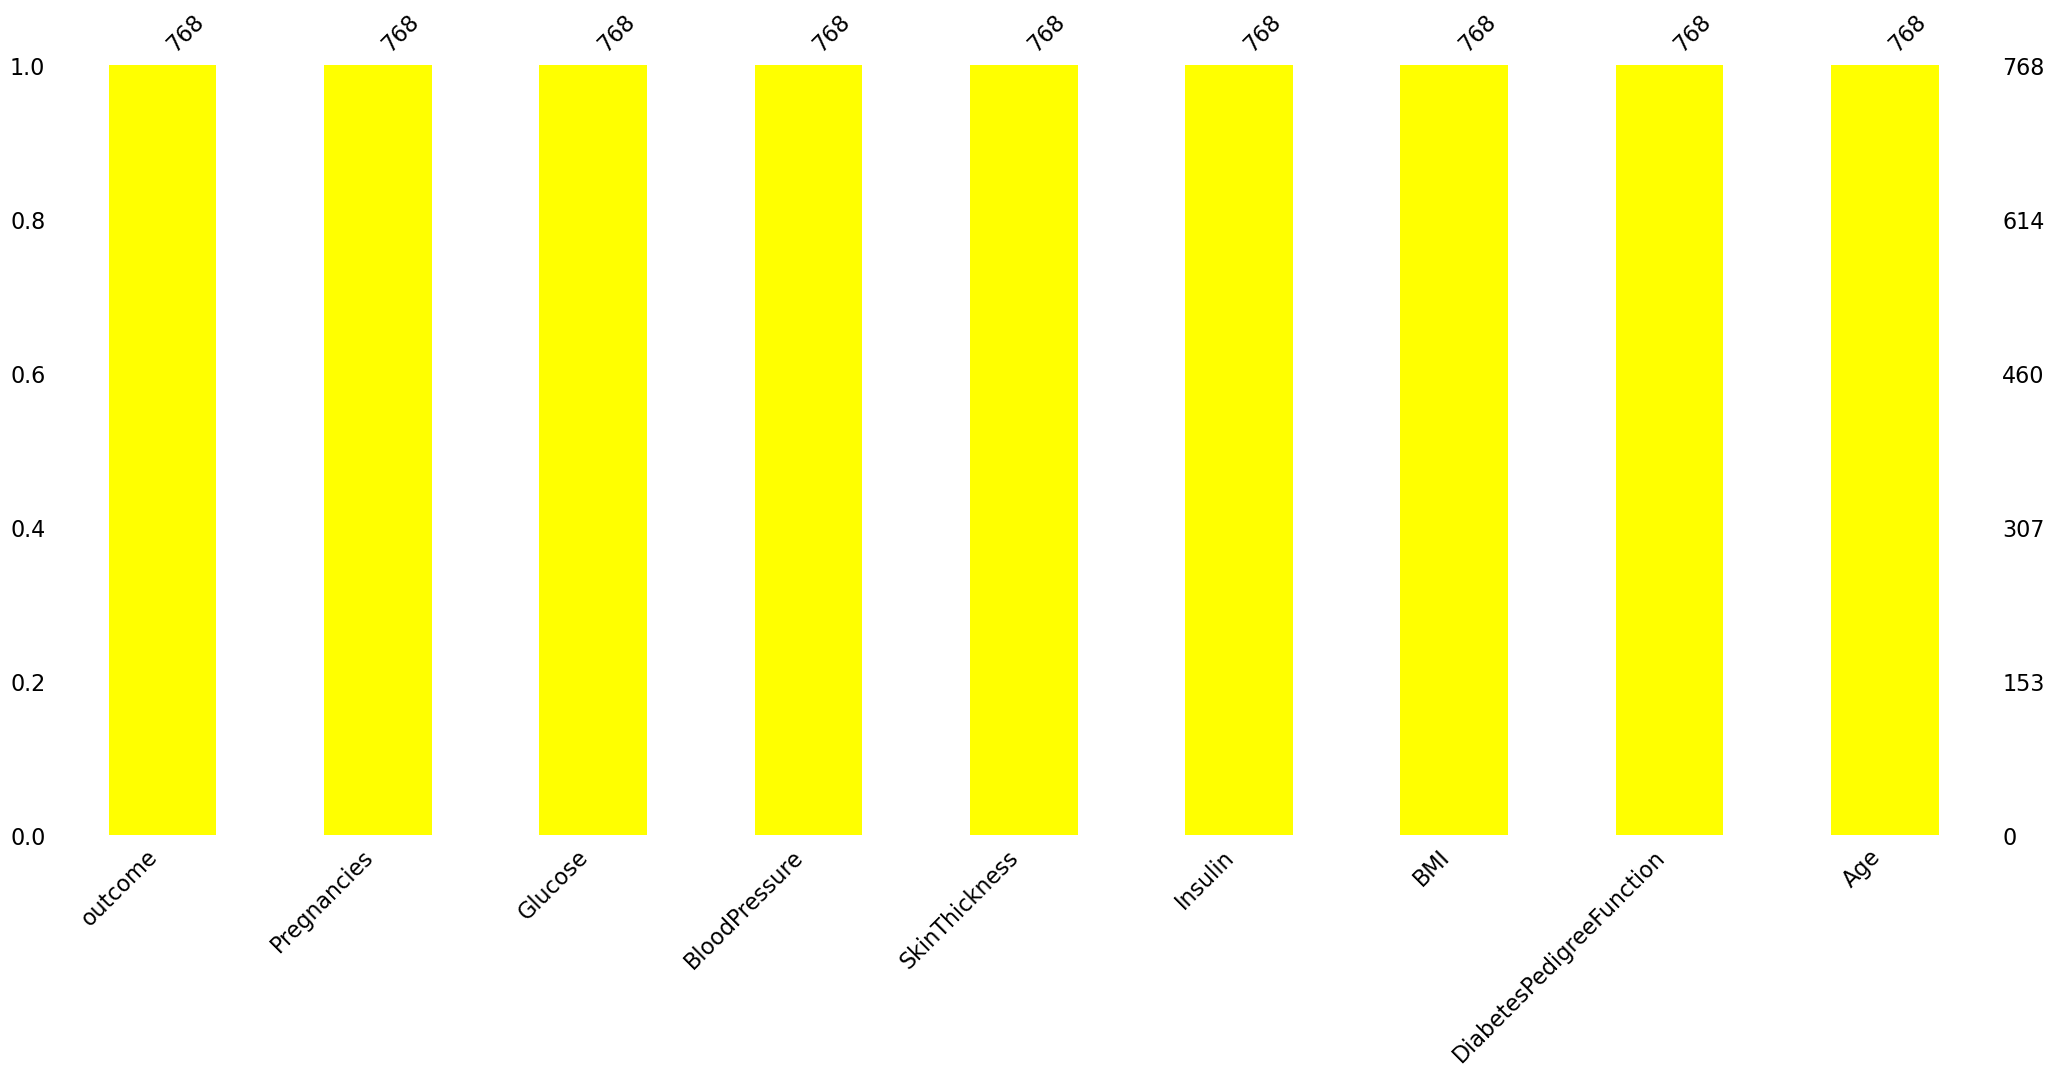

In [32]:
import missingno as msno
msno.bar(df, color="yellow")
plt.show()

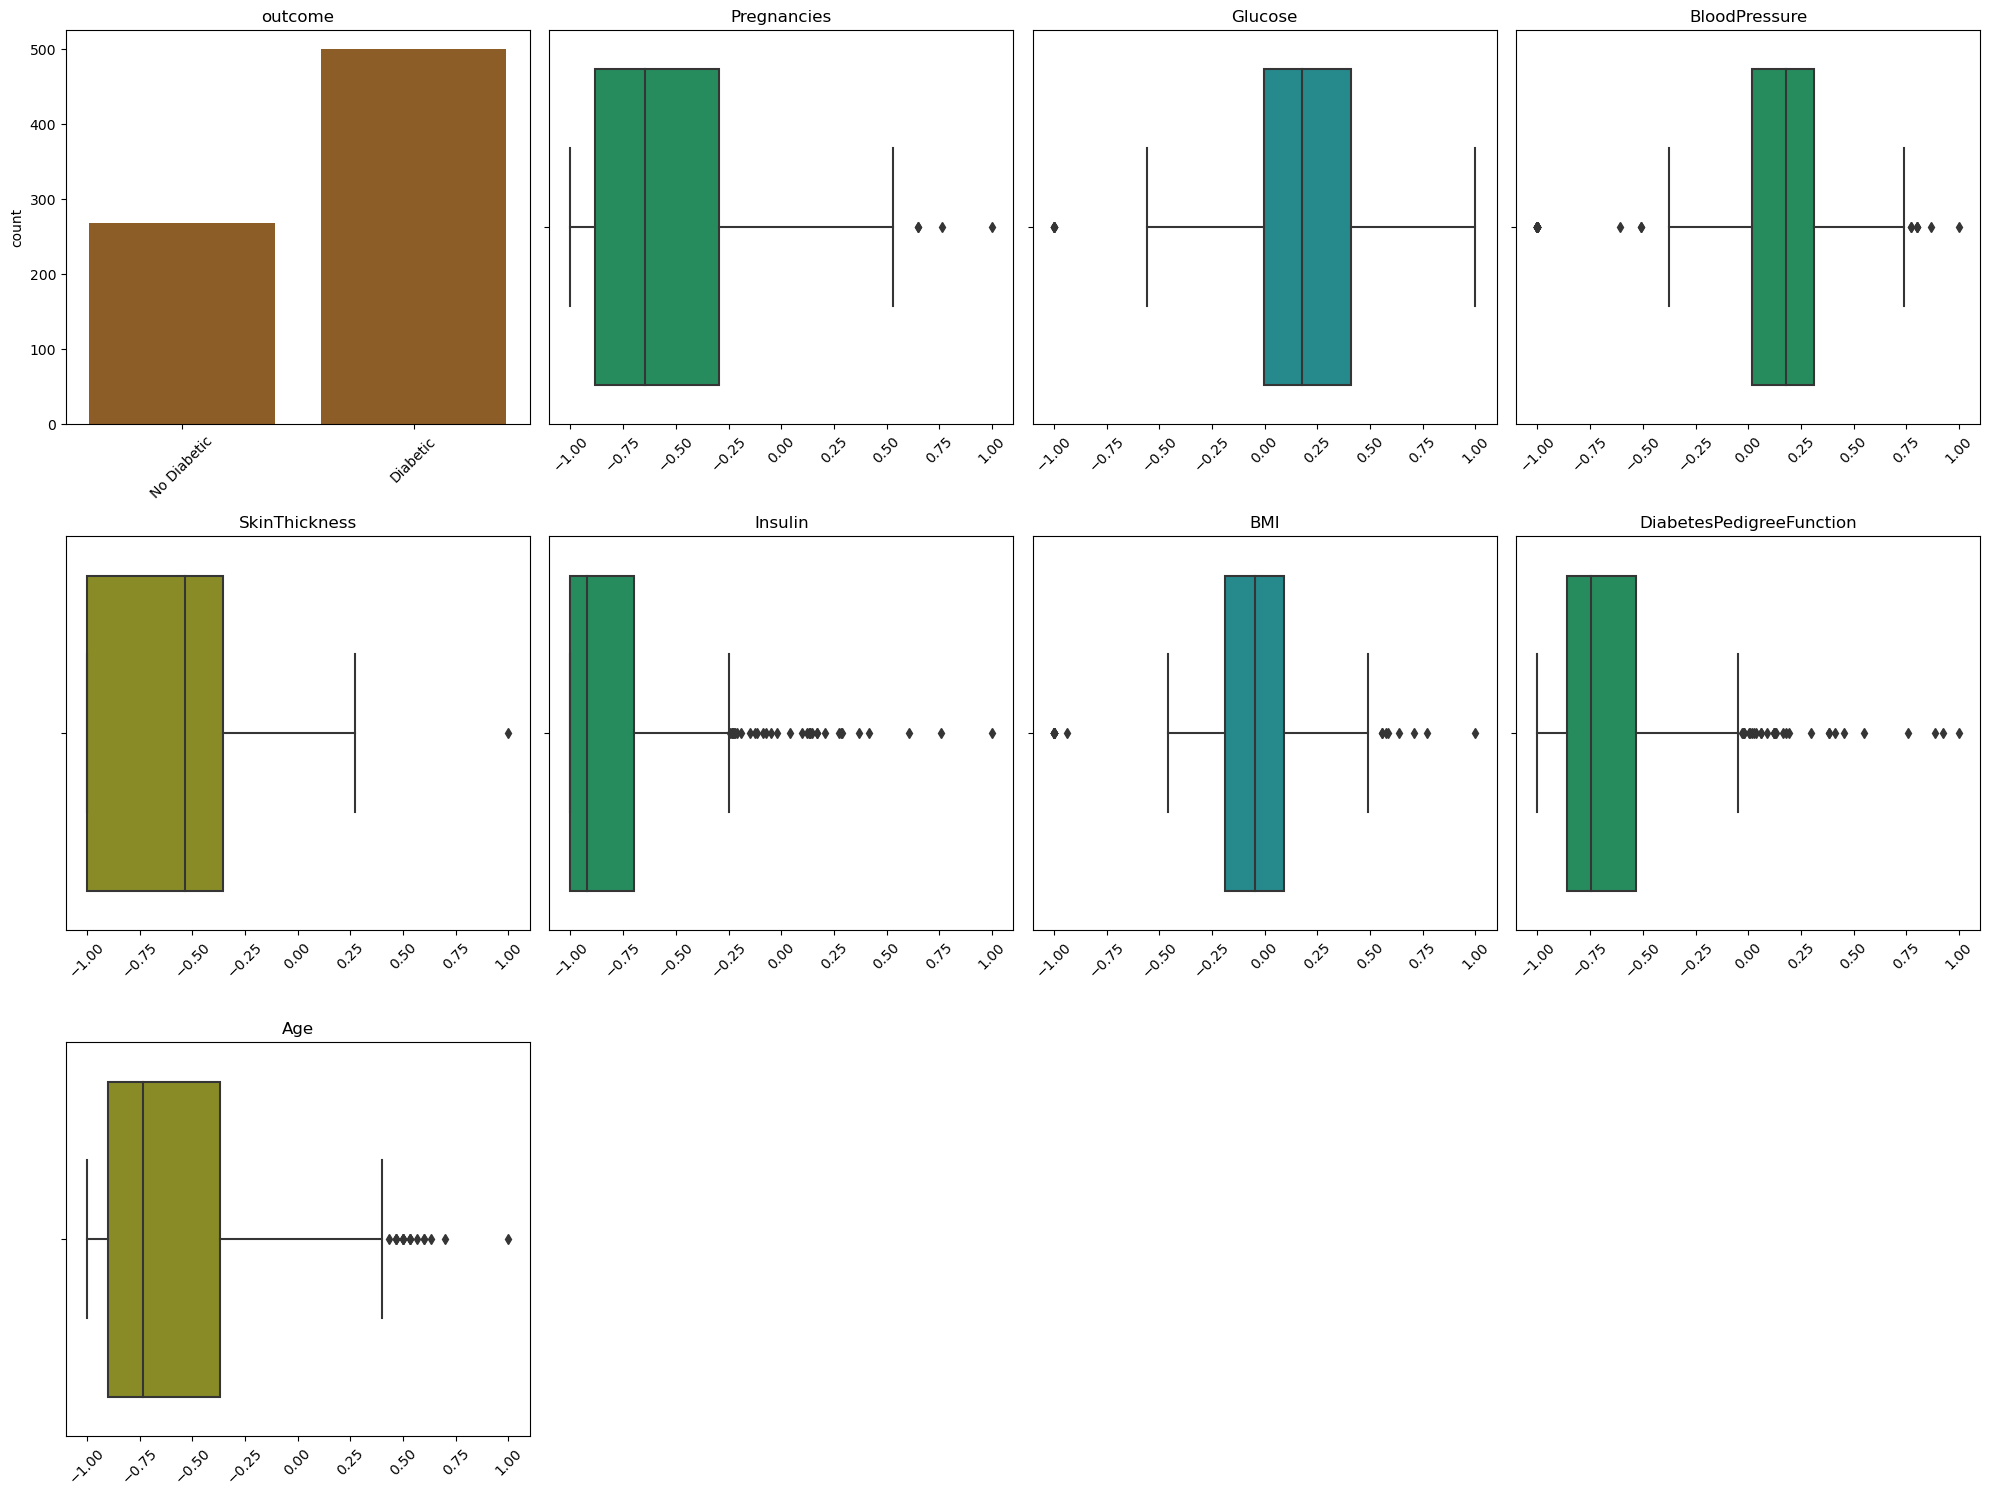

In [33]:
# Boxplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

def plot_variable(data, column, ax, color):
    if pd.api.types.is_numeric_dtype(data[column]):
        sns.boxplot(x=column, data=data, ax=ax, color=color)
    else:
        sns.countplot(x=column, data=data, ax=ax, color=color)
    ax.set_xlabel("")
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)

color2 = ["#9C1A15", "#159d5e", "#15999d", "#15559d", "#999d15", "#5e159d", "#159d5e", "#9d5e15"]

columns = df.columns.tolist()

n_rows = (len(columns) + 3) // 4  

f, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
axes = axes.flatten()  

for i, col in enumerate(columns):
    plot_variable(df, col, axes[i], random.choice(color2))

for j in range(i+1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [34]:
cleaned_df = df.copy()
cleaned_df

outcome  Pregnancies   Glucose  BloodPressure  SkinThickness  \
0    No Diabetic    -0.294118  0.487437       0.180328      -0.292929   
1       Diabetic    -0.882353 -0.145729       0.081967      -0.414141   
2    No Diabetic    -0.058824  0.839196       0.049180      -1.000000   
3       Diabetic    -0.882353 -0.105528       0.081967      -0.535354   
4    No Diabetic    -1.000000  0.376884      -0.344262      -0.292929   
..           ...          ...       ...            ...            ...   
763     Diabetic     0.176471  0.015075       0.245902      -0.030303   
764     Diabetic    -0.764706  0.226131       0.147541      -0.454545   
765     Diabetic    -0.411765  0.216080       0.180328      -0.535354   
766  No Diabetic    -0.882353  0.266332      -0.016393      -1.000000   
767     Diabetic    -0.882353 -0.065327       0.147541      -0.373737   

      Insulin       BMI  DiabetesPedigreeFunction       Age  
0   -1.000000  0.001490                 -0.531170 -0.033333  
1   -1.000000 -0.207153                 -0.766866 -0.666667  
2   -1.000000 -0.305514                 -0.492741 -0.633333  
3   -0.777778 -0.162444                 -0.923997 -1.000000  
4   -0.602837  0.284650                  0.887276 -0.600000  
..        ...       ...                       ...       ...  
763 -0.574468 -0.019374                 -0.920581  0.400000  
764 -1.000000  0.096870                 -0.776260 -0.800000  
765 -0.735225 -0.219076                 -0.857387 -0.700000  
766 -1.000000 -0.102832                 -0.768574 -0.133333  
767 -1.000000 -0.093890                 -0.797609 -0.933333  

[768 rows x 9 columns]

# 4. Prepare the dataset

# 4.1. Split data to train and test

In [35]:
X = df.drop('outcome', axis=1).values
y = df['outcome'].values
# Split into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4.2. Scaling data using Standard Scaler

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

Training set shape: (614, 8)
Testing set shape: (154, 8)


# 5. Single layer Perceptron Implementation

In [38]:
# Verify that the test set contains any rows from the training set.
duplicates_in_test = np.any([np.all(row == X_test_scaled, axis=1).any() for row in X_train_scaled])
print(f"Are there duplicate rows between training and test sets? {duplicates_in_test}")


Are there duplicate rows between training and test sets? False


In [39]:
class Perceptron:
    def __init__(self, no_of_inputs, learning_rate=0.01, n_iterations=100, l2_lambda=0.01):
        self.weights = np.zeros(no_of_inputs)  # Initialize weights to zero
        self.bias = 0.0  # Initialize bias to zero
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.l2_lambda = l2_lambda  # L2 regularization strength

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

    def fit(self, X, y):
        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation_function(linear_output)

                # Update rule with L2 regularization: w = w + lr * (y - y_pred) * x - lr * l2_lambda * w
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i] - self.learning_rate * self.l2_lambda * self.weights
                self.bias += update

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)

        # Calculate AUC only if both classes are present
        if len(np.unique(y)) > 1:
            auc = roc_auc_score(y, y_pred)
        else:
            auc = None

        cm = confusion_matrix(y, y_pred)
        return {'accuracy': accuracy, 'auc': auc, 'confusion_matrix': cm}

In [40]:
def preprocess_data(X, y):
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    
    # Encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y_encoded, le, scaler

In [41]:
X_train_scaled, y_train_numerical, le_train, scaler = preprocess_data(X_train, y_train)
X_test_scaled, y_test_numerical, le_test, scaler = preprocess_data(X_test, y_test)

In [42]:
no_of_inputs = X_train_scaled.shape[1]
perceptron = Perceptron(no_of_inputs=no_of_inputs, learning_rate=0.001, n_iterations=100, l2_lambda=0.01)
perceptron.fit(X_train_scaled, y_train_numerical)

In [43]:
# Analyze using test and train sets
train_eval = perceptron.evaluate(X_train_scaled, y_train_numerical)
test_eval = perceptron.evaluate(X_test_scaled, y_test_numerical)

In [44]:
no_of_inputs = X_train_scaled.shape[1]
perceptron = Perceptron(no_of_inputs=no_of_inputs, learning_rate=0.01, n_iterations=100)
perceptron.fit(X_train_scaled, y_train_numerical)


In [45]:
train_eval = perceptron.evaluate(X_train_scaled, y_train_numerical)
test_eval = perceptron.evaluate(X_test_scaled, y_test_numerical)

In [46]:
# Output the evaluation
print("Train Evaluation:")
print(f"Accuracy: {train_eval['accuracy']}")
if train_eval['auc'] is not None:
    print(f"AUC: {train_eval['auc']}")
else:
    print("AUC: Cannot be calculated, only one class present in the training data.")
print(f"Confusion Matrix:\n{train_eval['confusion_matrix']}")

print("\nTest Evaluation:")
print(f"Accuracy: {test_eval['accuracy']}")
if test_eval['auc'] is not None:
    print(f"AUC: {test_eval['auc']}")
else:
    print("AUC: Cannot be calculated, only one class present in the test data.")
print(f"Confusion Matrix:\n{test_eval['confusion_matrix']}")

Train Evaluation:
Accuracy: 0.7328990228013029
AUC: 0.7124299065420561
Confusion Matrix:
[[312  88]
 [ 76 138]]

Test Evaluation:
Accuracy: 0.7272727272727273
AUC: 0.7005555555555556
Confusion Matrix:
[[79 21]
 [21 33]]


In [47]:
# Feature importance
feature_importance = np.abs(perceptron.weights)
feature_names = df.columns.drop('outcome')

print("\nFeature Importance:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")


Feature Importance:
Pregnancies: 0.0173
Glucose: 0.0346
BloodPressure: 0.0070
SkinThickness: 0.0029
Insulin: 0.0274
BMI: 0.0236
DiabetesPedigreeFunction: 0.0009
Age: 0.0079


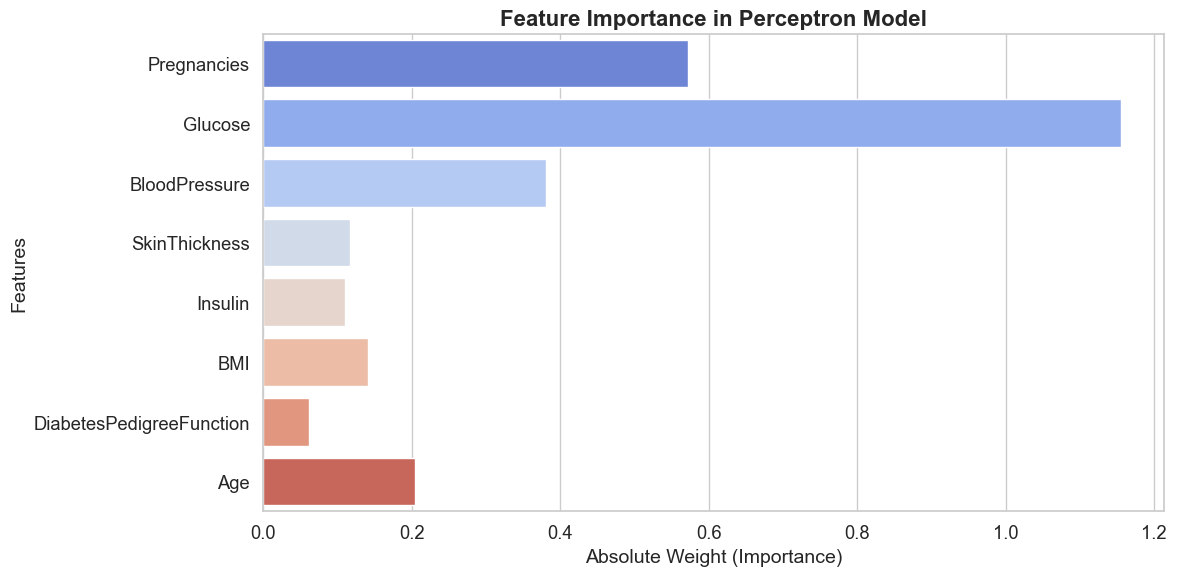

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

feature_importance = np.array([0.5725, 1.1550, 0.3810, 0.1169, 0.1097, 0.1416, 0.0610, 0.2045])
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                 'BMI', 'DiabetesPedigreeFunction', 'Age']

sns.set(style="whitegrid", font_scale=1.2)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names, palette="coolwarm")

plt.title('Feature Importance in Perceptron Model', fontsize=16, weight='bold')
plt.xlabel('Absolute Weight (Importance)', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = perceptron.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_numerical, y_test_pred)) 


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       100
           1       0.61      0.61      0.61        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



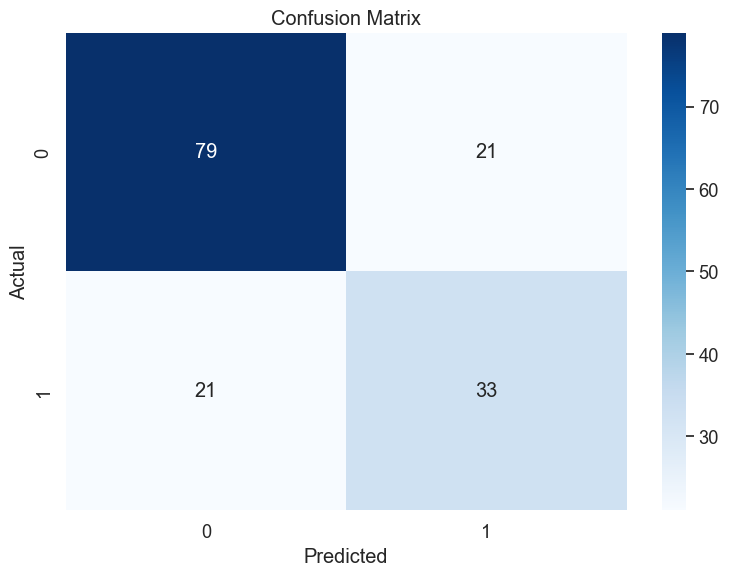

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_test_numerical = encoder.fit_transform(y_test)  

# Predict test labels
y_pred = perceptron.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test_numerical, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# MLP By Pytorch

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        # Define layers: input -> hidden1 -> hidden2 -> output
        self.input_fc = nn.Linear(input_dim, 128)
        self.hidden_fc = nn.Linear(128, 64)
        self.output_fc = nn.Linear(64, output_dim)

    def forward(self, x):
        # Pass through first hidden layer with ReLU activation
        x = F.relu(self.input_fc(x))

        # Pass through second hidden layer with ReLU activation
        x = F.relu(self.hidden_fc(x))

        # Output layer (no activation, as it's used in the loss function)
        y_pred = self.output_fc(x)
        
        return y_pred


By building an instance of our model and configuring its input and output dimensions appropriately, we will define our model.

In [52]:
input_dim = X_train_scaled.shape[1] 
output_dim = 2 

In [53]:
# Initialize the MLP model
model = MLP(input_dim, output_dim)

In [54]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.0001)

Next, we define the device. This is used to place your model and data on to a GPU, if you have one.

In [55]:
# Move model to device (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

We use the .to technique to attach our model and criteria to the device.

In [56]:
model = model.to(device)
criterion = criterion.to(device)

In [57]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [58]:
def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.train()

    for (x, y) in iterator:
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred = model(x)
        loss = criterion(y_pred, y)
        acc = calculate_accuracy(y_pred, y)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [59]:
def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()

    with torch.no_grad():
        for (x, y) in iterator:
            x = x.to(device)
            y = y.to(device)

            y_pred = model(x)
            loss = criterion(y_pred, y)
            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Defining a tiny function to inform us the duration of an epoch is the last step before training.

In [60]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [61]:
# Convert all labels in y_train and y_test to strings (to handle any mixed data types)
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [62]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch

y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Initialize the LabelEncoder
le = LabelEncoder()

combined_labels = np.concatenate([y_train, y_test])
le.fit(combined_labels)

LabelEncoder()

In [63]:
# Step 3: Transform y_train and y_test using the fitted LabelEncoder
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Step 4: Convert X_train, X_test, y_train, y_test to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)  
y_train = torch.tensor(y_train, dtype=torch.long)     

X_test = torch.tensor(X_test, dtype=torch.float32)    
y_test = torch.tensor(y_test, dtype=torch.long)

In [64]:
from torch.utils.data import DataLoader, TensorDataset

# Make train and test TensorDatasets.
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoaders for train and test
BATCH_SIZE = 64  
train_iterator = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_iterator = DataLoader(test_dataset, batch_size=BATCH_SIZE)


In [65]:
# Remap the test labels by hand
y_test = np.where(y_test == 2, 0, y_test)
y_test = np.where(y_test == 3, 1, y_test)

print("Mapped unique classes in y_test:", np.unique(y_test))


Mapped unique classes in y_test: [0 1]


In [66]:
import time
from tqdm import trange  

EPOCHS = 100
best_test_loss = float('inf')

for epoch in trange(EPOCHS):

    start_time = time.monotonic()

    # Utilising the training data, train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)

    # Utilising the test data, assess the model
    test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

    # If the test loss is less than the best test loss to date, save the model.
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        torch.save(model.state_dict(), 'best-model.pt')

    end_time = time.monotonic()

    # Determine how long each period takes.
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')


  1%|▍                                          | 1/100 [00:00<00:12,  8.01it/s]

Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 0.704 | Train Acc: 35.62%
	 Test Loss: 0.700 | Test Acc: 35.26%


  2%|▊                                          | 2/100 [00:00<00:14,  6.99it/s]

Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 0.692 | Train Acc: 47.73%
	 Test Loss: 0.687 | Test Acc: 64.42%
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 0.682 | Train Acc: 70.27%
	 Test Loss: 0.675 | Test Acc: 68.59%


  4%|█▋                                         | 4/100 [00:00<00:09, 10.01it/s]

Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 0.671 | Train Acc: 70.24%
	 Test Loss: 0.665 | Test Acc: 71.19%
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.661 | Train Acc: 68.93%
	 Test Loss: 0.655 | Test Acc: 69.39%


  7%|███                                        | 7/100 [00:00<00:06, 15.43it/s]

Epoch: 06 | Epoch Time: 0m 0s
	Train Loss: 0.654 | Train Acc: 67.15%
	 Test Loss: 0.645 | Test Acc: 68.87%
Epoch: 07 | Epoch Time: 0m 0s
	Train Loss: 0.647 | Train Acc: 65.78%
	 Test Loss: 0.636 | Test Acc: 68.87%
Epoch: 08 | Epoch Time: 0m 0s
	Train Loss: 0.637 | Train Acc: 66.74%
	 Test Loss: 0.628 | Test Acc: 68.87%
Epoch: 09 | Epoch Time: 0m 0s
	Train Loss: 0.629 | Train Acc: 66.96%
	 Test Loss: 0.621 | Test Acc: 68.35%
Epoch: 10 | Epoch Time: 0m 0s
	Train Loss: 0.624 | Train Acc: 66.53%
	 Test Loss: 0.614 | Test Acc: 68.35%


 11%|████▌                                     | 11/100 [00:00<00:04, 19.08it/s]

Epoch: 11 | Epoch Time: 0m 0s
	Train Loss: 0.616 | Train Acc: 67.17%
	 Test Loss: 0.608 | Test Acc: 68.35%


 13%|█████▍                                    | 13/100 [00:00<00:05, 16.25it/s]

Epoch: 12 | Epoch Time: 0m 0s
	Train Loss: 0.610 | Train Acc: 67.16%
	 Test Loss: 0.602 | Test Acc: 68.35%
Epoch: 13 | Epoch Time: 0m 0s
	Train Loss: 0.605 | Train Acc: 66.95%
	 Test Loss: 0.596 | Test Acc: 68.35%


 15%|██████▎                                   | 15/100 [00:00<00:05, 16.68it/s]

Epoch: 14 | Epoch Time: 0m 0s
	Train Loss: 0.600 | Train Acc: 67.42%
	 Test Loss: 0.590 | Test Acc: 69.39%
Epoch: 15 | Epoch Time: 0m 0s
	Train Loss: 0.593 | Train Acc: 68.16%
	 Test Loss: 0.585 | Test Acc: 69.39%


 17%|███████▏                                  | 17/100 [00:01<00:05, 15.27it/s]

Epoch: 16 | Epoch Time: 0m 0s
	Train Loss: 0.592 | Train Acc: 67.25%
	 Test Loss: 0.580 | Test Acc: 69.39%
Epoch: 17 | Epoch Time: 0m 0s
	Train Loss: 0.586 | Train Acc: 68.51%
	 Test Loss: 0.575 | Test Acc: 71.19%
Epoch: 18 | Epoch Time: 0m 0s
	Train Loss: 0.580 | Train Acc: 69.56%
	 Test Loss: 0.570 | Test Acc: 70.43%


 21%|████████▊                                 | 21/100 [00:01<00:05, 14.06it/s]

Epoch: 19 | Epoch Time: 0m 0s
	Train Loss: 0.574 | Train Acc: 70.81%
	 Test Loss: 0.566 | Test Acc: 71.71%
Epoch: 20 | Epoch Time: 0m 0s
	Train Loss: 0.573 | Train Acc: 70.90%
	 Test Loss: 0.561 | Test Acc: 70.95%
Epoch: 21 | Epoch Time: 0m 0s
	Train Loss: 0.569 | Train Acc: 70.58%
	 Test Loss: 0.556 | Test Acc: 72.24%


 23%|█████████▋                                | 23/100 [00:01<00:05, 14.18it/s]

Epoch: 22 | Epoch Time: 0m 0s
	Train Loss: 0.560 | Train Acc: 71.79%
	 Test Loss: 0.551 | Test Acc: 72.24%
Epoch: 23 | Epoch Time: 0m 0s
	Train Loss: 0.556 | Train Acc: 72.94%
	 Test Loss: 0.547 | Test Acc: 72.76%
Epoch: 24 | Epoch Time: 0m 0s
	Train Loss: 0.552 | Train Acc: 72.84%
	 Test Loss: 0.542 | Test Acc: 71.19%


 28%|███████████▊                              | 28/100 [00:01<00:04, 14.64it/s]

Epoch: 25 | Epoch Time: 0m 0s
	Train Loss: 0.545 | Train Acc: 72.99%
	 Test Loss: 0.538 | Test Acc: 71.71%
Epoch: 26 | Epoch Time: 0m 0s
	Train Loss: 0.541 | Train Acc: 73.31%
	 Test Loss: 0.533 | Test Acc: 72.76%
Epoch: 27 | Epoch Time: 0m 0s
	Train Loss: 0.534 | Train Acc: 74.25%
	 Test Loss: 0.530 | Test Acc: 71.19%
Epoch: 28 | Epoch Time: 0m 0s
	Train Loss: 0.533 | Train Acc: 74.29%
	 Test Loss: 0.526 | Test Acc: 71.19%


 30%|████████████▌                             | 30/100 [00:02<00:05, 12.57it/s]

Epoch: 29 | Epoch Time: 0m 0s
	Train Loss: 0.525 | Train Acc: 75.30%
	 Test Loss: 0.522 | Test Acc: 71.71%
Epoch: 30 | Epoch Time: 0m 0s
	Train Loss: 0.524 | Train Acc: 74.65%
	 Test Loss: 0.518 | Test Acc: 72.24%
Epoch: 31 | Epoch Time: 0m 0s
	Train Loss: 0.518 | Train Acc: 75.70%
	 Test Loss: 0.515 | Test Acc: 72.24%
Epoch: 32 | Epoch Time: 0m 0s
	Train Loss: 0.516 | Train Acc: 76.44%
	 Test Loss: 0.512 | Test Acc: 72.48%


 33%|█████████████▊                            | 33/100 [00:02<00:07,  9.05it/s]

Epoch: 33 | Epoch Time: 0m 0s
	Train Loss: 0.512 | Train Acc: 76.48%
	 Test Loss: 0.509 | Test Acc: 73.00%
Epoch: 34 | Epoch Time: 0m 0s
	Train Loss: 0.507 | Train Acc: 77.06%
	 Test Loss: 0.507 | Test Acc: 73.52%


 35%|██████████████▋                           | 35/100 [00:03<00:14,  4.35it/s]

Epoch: 35 | Epoch Time: 0m 0s
	Train Loss: 0.504 | Train Acc: 77.43%
	 Test Loss: 0.504 | Test Acc: 73.52%


 37%|███████████████▌                          | 37/100 [00:04<00:13,  4.50it/s]

Epoch: 36 | Epoch Time: 0m 0s
	Train Loss: 0.505 | Train Acc: 77.11%
	 Test Loss: 0.501 | Test Acc: 73.52%
Epoch: 37 | Epoch Time: 0m 0s
	Train Loss: 0.498 | Train Acc: 77.53%
	 Test Loss: 0.499 | Test Acc: 73.52%


 39%|████████████████▍                         | 39/100 [00:04<00:11,  5.15it/s]

Epoch: 38 | Epoch Time: 0m 0s
	Train Loss: 0.492 | Train Acc: 77.64%
	 Test Loss: 0.497 | Test Acc: 74.04%
Epoch: 39 | Epoch Time: 0m 0s
	Train Loss: 0.493 | Train Acc: 76.74%
	 Test Loss: 0.496 | Test Acc: 74.56%


 40%|████████████████▊                         | 40/100 [00:04<00:11,  5.23it/s]

Epoch: 40 | Epoch Time: 0m 0s
	Train Loss: 0.489 | Train Acc: 76.80%
	 Test Loss: 0.494 | Test Acc: 75.60%
Epoch: 41 | Epoch Time: 0m 0s
	Train Loss: 0.486 | Train Acc: 77.11%
	 Test Loss: 0.492 | Test Acc: 75.08%


 42%|█████████████████▋                        | 42/100 [00:05<00:09,  6.20it/s]

Epoch: 42 | Epoch Time: 0m 0s
	Train Loss: 0.484 | Train Acc: 76.90%
	 Test Loss: 0.490 | Test Acc: 75.60%


 44%|██████████████████▍                       | 44/100 [00:05<00:09,  6.03it/s]

Epoch: 43 | Epoch Time: 0m 0s
	Train Loss: 0.477 | Train Acc: 77.85%
	 Test Loss: 0.489 | Test Acc: 76.12%
Epoch: 44 | Epoch Time: 0m 0s
	Train Loss: 0.479 | Train Acc: 77.16%
	 Test Loss: 0.488 | Test Acc: 76.12%


 45%|██████████████████▉                       | 45/100 [00:05<00:09,  6.05it/s]

Epoch: 45 | Epoch Time: 0m 0s
	Train Loss: 0.472 | Train Acc: 77.80%
	 Test Loss: 0.487 | Test Acc: 76.12%


 47%|███████████████████▋                      | 47/100 [00:05<00:08,  5.99it/s]

Epoch: 46 | Epoch Time: 0m 0s
	Train Loss: 0.477 | Train Acc: 77.27%
	 Test Loss: 0.486 | Test Acc: 76.12%
Epoch: 47 | Epoch Time: 0m 0s
	Train Loss: 0.472 | Train Acc: 77.32%
	 Test Loss: 0.485 | Test Acc: 76.12%


 49%|████████████████████▌                     | 49/100 [00:06<00:07,  6.77it/s]

Epoch: 48 | Epoch Time: 0m 0s
	Train Loss: 0.473 | Train Acc: 77.26%
	 Test Loss: 0.484 | Test Acc: 76.12%
Epoch: 49 | Epoch Time: 0m 0s
	Train Loss: 0.468 | Train Acc: 78.31%
	 Test Loss: 0.483 | Test Acc: 76.12%


 51%|█████████████████████▍                    | 51/100 [00:06<00:06,  7.83it/s]

Epoch: 50 | Epoch Time: 0m 0s
	Train Loss: 0.473 | Train Acc: 77.20%
	 Test Loss: 0.482 | Test Acc: 76.12%
Epoch: 51 | Epoch Time: 0m 0s
	Train Loss: 0.464 | Train Acc: 78.00%
	 Test Loss: 0.481 | Test Acc: 76.12%


 54%|██████████████████████▋                   | 54/100 [00:06<00:04, 10.45it/s]

Epoch: 52 | Epoch Time: 0m 0s
	Train Loss: 0.465 | Train Acc: 78.52%
	 Test Loss: 0.481 | Test Acc: 76.12%
Epoch: 53 | Epoch Time: 0m 0s
	Train Loss: 0.462 | Train Acc: 78.41%
	 Test Loss: 0.480 | Test Acc: 76.12%
Epoch: 54 | Epoch Time: 0m 0s
	Train Loss: 0.464 | Train Acc: 78.36%
	 Test Loss: 0.480 | Test Acc: 74.84%
Epoch: 55 | Epoch Time: 0m 0s
	Train Loss: 0.457 | Train Acc: 78.84%
	 Test Loss: 0.480 | Test Acc: 75.36%


 56%|███████████████████████▌                  | 56/100 [00:06<00:03, 12.26it/s]

Epoch: 56 | Epoch Time: 0m 0s
	Train Loss: 0.460 | Train Acc: 78.47%
	 Test Loss: 0.478 | Test Acc: 76.64%
Epoch: 57 | Epoch Time: 0m 0s
	Train Loss: 0.459 | Train Acc: 78.89%
	 Test Loss: 0.478 | Test Acc: 75.36%


 58%|████████████████████████▎                 | 58/100 [00:06<00:03, 11.22it/s]

Epoch: 58 | Epoch Time: 0m 0s
	Train Loss: 0.459 | Train Acc: 78.31%
	 Test Loss: 0.478 | Test Acc: 75.36%
Epoch: 59 | Epoch Time: 0m 0s
	Train Loss: 0.462 | Train Acc: 78.31%
	 Test Loss: 0.478 | Test Acc: 75.88%


 61%|█████████████████████████▌                | 61/100 [00:07<00:06,  5.83it/s]

Epoch: 60 | Epoch Time: 0m 0s
	Train Loss: 0.457 | Train Acc: 78.52%
	 Test Loss: 0.477 | Test Acc: 75.88%
Epoch: 61 | Epoch Time: 0m 0s
	Train Loss: 0.456 | Train Acc: 78.52%
	 Test Loss: 0.477 | Test Acc: 75.88%


 63%|██████████████████████████▍               | 63/100 [00:07<00:04,  7.43it/s]

Epoch: 62 | Epoch Time: 0m 0s
	Train Loss: 0.452 | Train Acc: 78.84%
	 Test Loss: 0.477 | Test Acc: 75.36%
Epoch: 63 | Epoch Time: 0m 0s
	Train Loss: 0.458 | Train Acc: 78.09%
	 Test Loss: 0.476 | Test Acc: 75.36%
Epoch: 64 | Epoch Time: 0m 0s
	Train Loss: 0.453 | Train Acc: 78.63%
	 Test Loss: 0.476 | Test Acc: 75.36%


 68%|████████████████████████████▌             | 68/100 [00:08<00:04,  7.94it/s]

Epoch: 65 | Epoch Time: 0m 0s
	Train Loss: 0.460 | Train Acc: 78.09%
	 Test Loss: 0.475 | Test Acc: 75.36%
Epoch: 66 | Epoch Time: 0m 0s
	Train Loss: 0.454 | Train Acc: 78.63%
	 Test Loss: 0.475 | Test Acc: 75.36%
Epoch: 67 | Epoch Time: 0m 0s
	Train Loss: 0.451 | Train Acc: 78.36%
	 Test Loss: 0.474 | Test Acc: 75.36%
Epoch: 68 | Epoch Time: 0m 0s
	Train Loss: 0.455 | Train Acc: 78.03%
	 Test Loss: 0.474 | Test Acc: 75.36%
Epoch: 69 | Epoch Time: 0m 0s
	Train Loss: 0.448 | Train Acc: 79.00%
	 Test Loss: 0.474 | Test Acc: 75.36%


 72%|██████████████████████████████▏           | 72/100 [00:08<00:02, 10.15it/s]

Epoch: 70 | Epoch Time: 0m 0s
	Train Loss: 0.447 | Train Acc: 78.78%
	 Test Loss: 0.474 | Test Acc: 75.36%
Epoch: 71 | Epoch Time: 0m 0s
	Train Loss: 0.454 | Train Acc: 78.57%
	 Test Loss: 0.473 | Test Acc: 75.36%
Epoch: 72 | Epoch Time: 0m 0s
	Train Loss: 0.450 | Train Acc: 78.51%
	 Test Loss: 0.472 | Test Acc: 75.36%


 74%|███████████████████████████████           | 74/100 [00:09<00:03,  6.72it/s]

Epoch: 73 | Epoch Time: 0m 0s
	Train Loss: 0.449 | Train Acc: 79.10%
	 Test Loss: 0.473 | Test Acc: 75.36%
Epoch: 74 | Epoch Time: 0m 0s
	Train Loss: 0.451 | Train Acc: 78.83%
	 Test Loss: 0.472 | Test Acc: 74.84%
Epoch: 75 | Epoch Time: 0m 0s
	Train Loss: 0.449 | Train Acc: 78.62%
	 Test Loss: 0.472 | Test Acc: 74.84%


 76%|███████████████████████████████▉          | 76/100 [00:10<00:05,  4.63it/s]

Epoch: 76 | Epoch Time: 0m 0s
	Train Loss: 0.452 | Train Acc: 78.67%
	 Test Loss: 0.473 | Test Acc: 75.36%


 77%|████████████████████████████████▎         | 77/100 [00:10<00:05,  3.92it/s]

Epoch: 77 | Epoch Time: 0m 0s
	Train Loss: 0.443 | Train Acc: 79.78%
	 Test Loss: 0.472 | Test Acc: 74.84%


 78%|████████████████████████████████▊         | 78/100 [00:11<00:07,  2.96it/s]

Epoch: 78 | Epoch Time: 0m 0s
	Train Loss: 0.445 | Train Acc: 79.36%
	 Test Loss: 0.471 | Test Acc: 75.36%


 79%|█████████████████████████████████▏        | 79/100 [00:11<00:08,  2.57it/s]

Epoch: 79 | Epoch Time: 0m 0s
	Train Loss: 0.448 | Train Acc: 78.83%
	 Test Loss: 0.471 | Test Acc: 75.36%


 81%|██████████████████████████████████        | 81/100 [00:12<00:05,  3.20it/s]

Epoch: 80 | Epoch Time: 0m 0s
	Train Loss: 0.444 | Train Acc: 79.36%
	 Test Loss: 0.472 | Test Acc: 74.84%
Epoch: 81 | Epoch Time: 0m 0s
	Train Loss: 0.445 | Train Acc: 79.35%
	 Test Loss: 0.471 | Test Acc: 74.84%


 83%|██████████████████████████████████▊       | 83/100 [00:12<00:03,  4.41it/s]

Epoch: 82 | Epoch Time: 0m 0s
	Train Loss: 0.449 | Train Acc: 79.09%
	 Test Loss: 0.471 | Test Acc: 74.84%
Epoch: 83 | Epoch Time: 0m 0s
	Train Loss: 0.445 | Train Acc: 79.51%
	 Test Loss: 0.471 | Test Acc: 74.84%
Epoch: 84 | Epoch Time: 0m 0s
	Train Loss: 0.443 | Train Acc: 79.41%
	 Test Loss: 0.470 | Test Acc: 74.84%


 85%|███████████████████████████████████▋      | 85/100 [00:12<00:02,  5.91it/s]

Epoch: 85 | Epoch Time: 0m 0s
	Train Loss: 0.443 | Train Acc: 79.51%
	 Test Loss: 0.470 | Test Acc: 74.84%


 86%|████████████████████████████████████      | 86/100 [00:12<00:02,  5.65it/s]

Epoch: 86 | Epoch Time: 0m 0s
	Train Loss: 0.443 | Train Acc: 79.36%
	 Test Loss: 0.469 | Test Acc: 74.32%
Epoch: 87 | Epoch Time: 0m 0s
	Train Loss: 0.442 | Train Acc: 79.62%
	 Test Loss: 0.469 | Test Acc: 74.84%


 89%|█████████████████████████████████████▍    | 89/100 [00:13<00:01,  6.00it/s]

Epoch: 88 | Epoch Time: 0m 0s
	Train Loss: 0.445 | Train Acc: 79.09%
	 Test Loss: 0.469 | Test Acc: 74.84%
Epoch: 89 | Epoch Time: 0m 0s
	Train Loss: 0.443 | Train Acc: 79.30%
	 Test Loss: 0.469 | Test Acc: 74.84%


 90%|█████████████████████████████████████▊    | 90/100 [00:13<00:01,  6.11it/s]

Epoch: 90 | Epoch Time: 0m 0s
	Train Loss: 0.439 | Train Acc: 79.73%
	 Test Loss: 0.469 | Test Acc: 74.84%


 91%|██████████████████████████████████████▏   | 91/100 [00:13<00:01,  5.55it/s]

Epoch: 91 | Epoch Time: 0m 0s
	Train Loss: 0.439 | Train Acc: 79.62%
	 Test Loss: 0.469 | Test Acc: 74.84%


 92%|██████████████████████████████████████▋   | 92/100 [00:14<00:01,  4.64it/s]

Epoch: 92 | Epoch Time: 0m 0s
	Train Loss: 0.440 | Train Acc: 79.51%
	 Test Loss: 0.469 | Test Acc: 74.84%


 95%|███████████████████████████████████████▉  | 95/100 [00:14<00:00,  6.28it/s]

Epoch: 93 | Epoch Time: 0m 0s
	Train Loss: 0.442 | Train Acc: 79.30%
	 Test Loss: 0.468 | Test Acc: 73.56%
Epoch: 94 | Epoch Time: 0m 0s
	Train Loss: 0.448 | Train Acc: 78.72%
	 Test Loss: 0.468 | Test Acc: 73.04%
Epoch: 95 | Epoch Time: 0m 0s
	Train Loss: 0.445 | Train Acc: 78.72%
	 Test Loss: 0.467 | Test Acc: 73.04%
Epoch: 96 | Epoch Time: 0m 0s
	Train Loss: 0.445 | Train Acc: 79.30%
	 Test Loss: 0.468 | Test Acc: 73.56%


 97%|████████████████████████████████████████▋ | 97/100 [00:14<00:00,  8.05it/s]

Epoch: 97 | Epoch Time: 0m 0s
	Train Loss: 0.439 | Train Acc: 79.78%
	 Test Loss: 0.468 | Test Acc: 73.56%
Epoch: 98 | Epoch Time: 0m 0s
	Train Loss: 0.439 | Train Acc: 79.93%
	 Test Loss: 0.468 | Test Acc: 73.04%


100%|█████████████████████████████████████████| 100/100 [00:15<00:00,  6.63it/s]

Epoch: 99 | Epoch Time: 0m 0s
	Train Loss: 0.440 | Train Acc: 79.56%
	 Test Loss: 0.467 | Test Acc: 73.04%
Epoch: 100 | Epoch Time: 0m 0s
	Train Loss: 0.437 | Train Acc: 79.56%
	 Test Loss: 0.467 | Test Acc: 73.04%


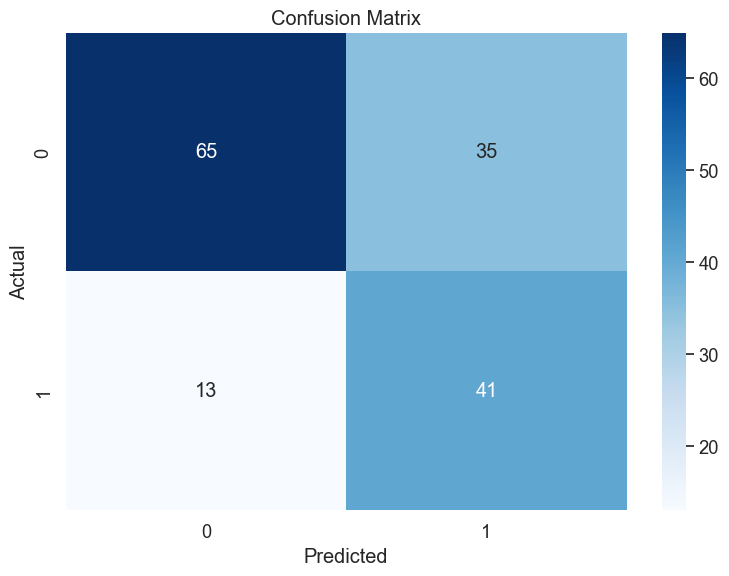


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       100
           1       0.54      0.76      0.63        54

    accuracy                           0.69       154
   macro avg       0.69      0.70      0.68       154
weighted avg       0.73      0.69      0.70       154



In [67]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Put the model in evaluation mode.
model.eval()

# Transfer test data to a PyTorch tensor before proceeding to the device.
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

# During evaluation, make sure no gradients are computed.
with torch.no_grad():
    y_pred_logits = model(X_test_tensor)  # Forward pass to get raw logits
    y_pred = torch.argmax(y_pred_logits, dim=1).cpu().numpy()  # Convert to class predictions

# There is no need to call as y_test is already a NumPy array.on it, cpu()
y_test_numerical = y_test  

cm = confusion_matrix(y_test_numerical, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_numerical, y_pred))

# Choosing Best Model 

In [68]:
import torch.optim as optim
from sklearn.model_selection import ParameterGrid  # To generate the grid of hyperparameters

import torch.optim as optim
from sklearn.model_selection import ParameterGrid

class GridSearch:
    
    def __init__(self, X_train, y_train, model_class, hyperparameters, input_dim, output_dim, criterion, device):
        self.X_train = X_train
        self.y_train = y_train
        self.model_class = model_class  # Pass the model class (MLP or SLP)
        self.hyperparameters = hyperparameters
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.criterion = criterion
        self.device = device
        self.best_model = None  # Placeholder to store the best model
        
    def perform_grid_search(self):
        best_loss = float('inf')
        best_params = None

        # Make a grid with every combination of parameters.
        param_grid = ParameterGrid(self.hyperparameters)

        for params in param_grid:
            print(f"Testing parameters: {params}")

            # Start the model using the dimensions of the input and output.
            model = self.model_class(self.input_dim, self.output_dim).to(self.device)
            
            # Choose optimizer based on parameters
            optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['alpha'])

            # Learn the model over a single epoch (may be extended to multiple epochs if necessary).
            model.train()
            optimizer.zero_grad()

            # Forward pass
            y_pred = model(self.X_train.to(self.device))
            loss = self.criterion(y_pred, self.y_train.to(self.device))

            # Backward pass and optimization step
            loss.backward()
            optimizer.step()

            # Verify whether this model is superior (has a lower loss).
            if loss.item() < best_loss:
                best_loss = loss.item()
                self.best_model = model  # Save the best model so far
                best_params = params

            print(f"Loss: {loss.item()}")

        print(f"Best Loss: {best_loss} using parameters: {best_params}")
        return self.best_model, best_loss, best_params
    
    def BestModelPredict(self, X_test):
        if self.best_model is None:
            self.best_model, _, _ = self.perform_grid_search()  # Perform grid search if not done yet
        
        self.best_model.eval() 
        with torch.no_grad():
            y_pred_logits = self.best_model(X_test.to(self.device))  # Get logits
            y_pred = torch.argmax(y_pred_logits, dim=1).cpu().numpy()  # Convert logits to class predictions
        return y_pred


# Create a Scikit-learn Wrapper for PyTorch Model

To make the PyTorch model compatible with GridSearchCV, which requires models to have fit and predict techniques for tweaking and selection, I wrapped the model in a scikit-learn compliant wrapper.

In [69]:
from sklearn.base import BaseEstimator, ClassifierMixin
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV

class SklearnMLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, output_dim, hidden_layer_sizes=(128, 64), activation='relu', solver='adam', alpha=0.0001, learning_rate_init=0.001, max_iter=200):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.solver = solver
        self.alpha = alpha
        self.learning_rate_init = learning_rate_init
        self.max_iter = max_iter
        self.model = self._build_model()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def _build_model(self):
        layers = []
        input_size = self.input_dim
        for hidden_size in self.hidden_layer_sizes:
            layers.append(nn.Linear(input_size, hidden_size))
            if self.activation == 'relu':
                layers.append(nn.ReLU())
            elif self.activation == 'tanh':
                layers.append(nn.Tanh())
            input_size = hidden_size
        layers.append(nn.Linear(input_size, self.output_dim))
        return nn.Sequential(*layers)

    def fit(self, X, y):
        # Convert X and y to tensors
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)

        # Move the model to the device
        self.model = self.model.to(self.device)

        # Define the loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        if self.solver == 'adam':
            optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate_init, weight_decay=self.alpha)
        elif self.solver == 'sgd':
            optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate_init, weight_decay=self.alpha)

        # Training loop
        for epoch in range(self.max_iter):
            optimizer.zero_grad()
            output = self.model(X_tensor)
            loss = criterion(output, y_tensor)
            loss.backward()
            optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()  # Set the model to evaluation mode
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            output = self.model(X_tensor)
        predictions = torch.argmax(output, dim=1).cpu().numpy()
        return predictions

    def score(self, X, y):
        predictions = self.predict(X)
        accuracy = (predictions == y).mean()
        return accuracy


In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameters 
params = {
    'hidden_layer_sizes': [(128, 64), (64, 64), (128, 128), (256, 128), (64, 32)],  # Different layer configurations
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameters
    'learning_rate_init': [0.001, 0.0001, 0.01],  # Learning rates
}

# Initialize the MLPClassifier
mlp_model = MLPClassifier(max_iter=500, random_state=42)

# Initialize GridSearchCV with 3-fold cross-validation
gs = GridSearchCV(mlp_model, params, cv=3, n_jobs=-1, verbose=2)

# Fit the model on the training data
gs.fit(X_train, y_train)

# Get the best model based on GridSearchCV results
final_model = gs.best_estimator_

# Predict on the test data
test_predictions = final_model.predict(X_test)

# Calculate and print accuracy on the test data
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the best model details
print("Best Model :", final_model)
print("Test Accuracy of Best Model:", test_accuracy)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


/Users/harish/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harish/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harish/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harish/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harish/anaconda3/lib/pyth

Best Model : MLPClassifier(alpha=0.01, hidden_layer_sizes=(64, 64), learning_rate_init=0.01,
              max_iter=500, random_state=42, solver='sgd')
Test Accuracy of Best Model: 0.7467532467532467


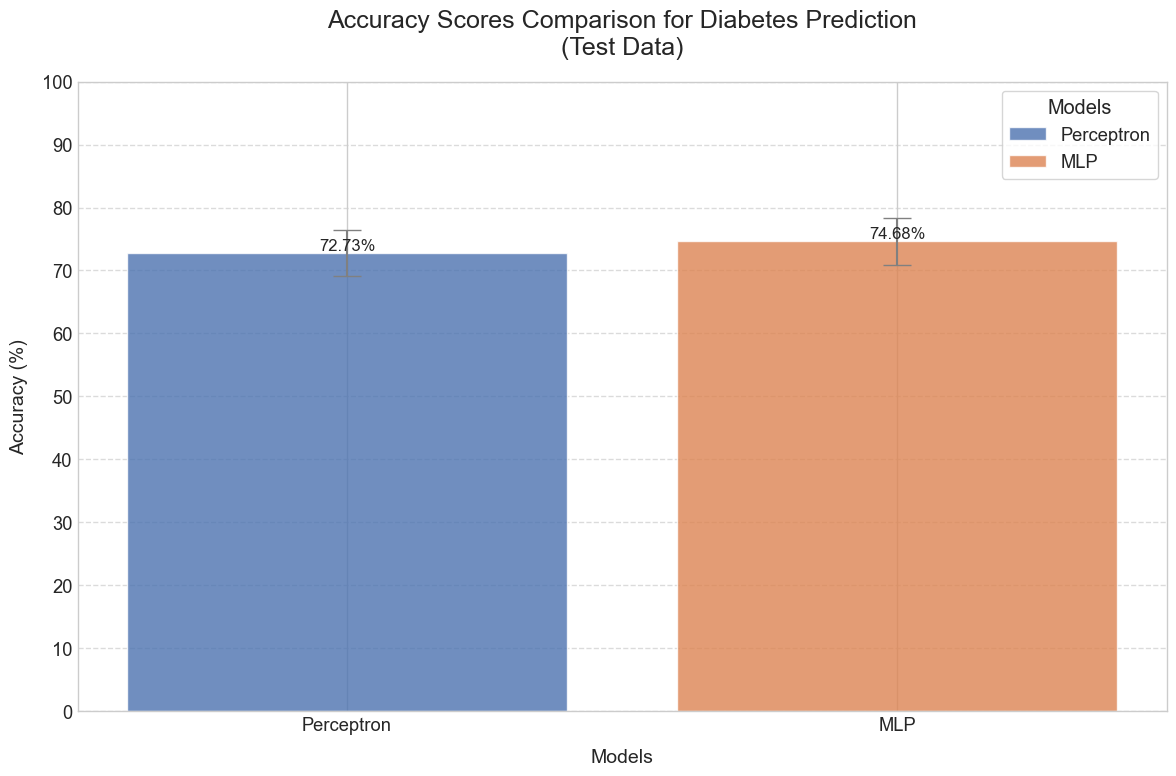

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

perceptron_accuracy = test_eval['accuracy']  
mlp_accuracy = test_accuracy  


accuracies = {
    'Perceptron': perceptron_accuracy * 100, 
    'MLP': mlp_accuracy * 100  
}

error_margin = 5  
errors = {model: accuracy * 0.05 for model, accuracy in accuracies.items()}

# Set up the plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Create the visualisation
fig, ax = plt.subplots(figsize=(12, 8))

# Create the bar plot
bars = ax.bar(list(accuracies.keys()), list(accuracies.values()), 
              yerr=list(errors.values()), capsize=10, 
              color=sns.color_palette("deep", 2), 
              ecolor='gray', alpha=0.8)

# Customize the plot
ax.set_ylim(0, 100)  
ax.set_yticks(np.arange(0, 101, 10))  
ax.set_ylabel('Accuracy (%)', fontsize=14, labelpad=10)
ax.set_xlabel('Models', fontsize=14, labelpad=10)
ax.set_title('Accuracy Scores Comparison for Diabetes Prediction\n(Test Data)', 
             fontsize=18, pad=20)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=12)

ax.legend(bars, list(accuracies.keys()), title="Models", loc="upper right", frameon=True)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

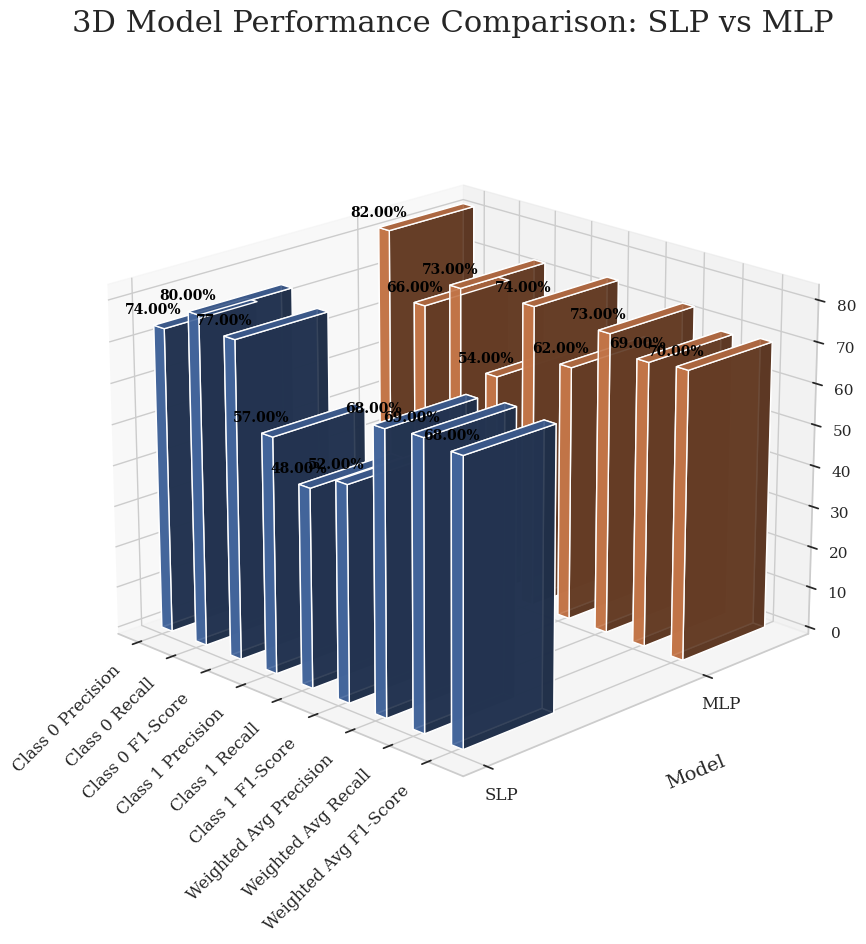

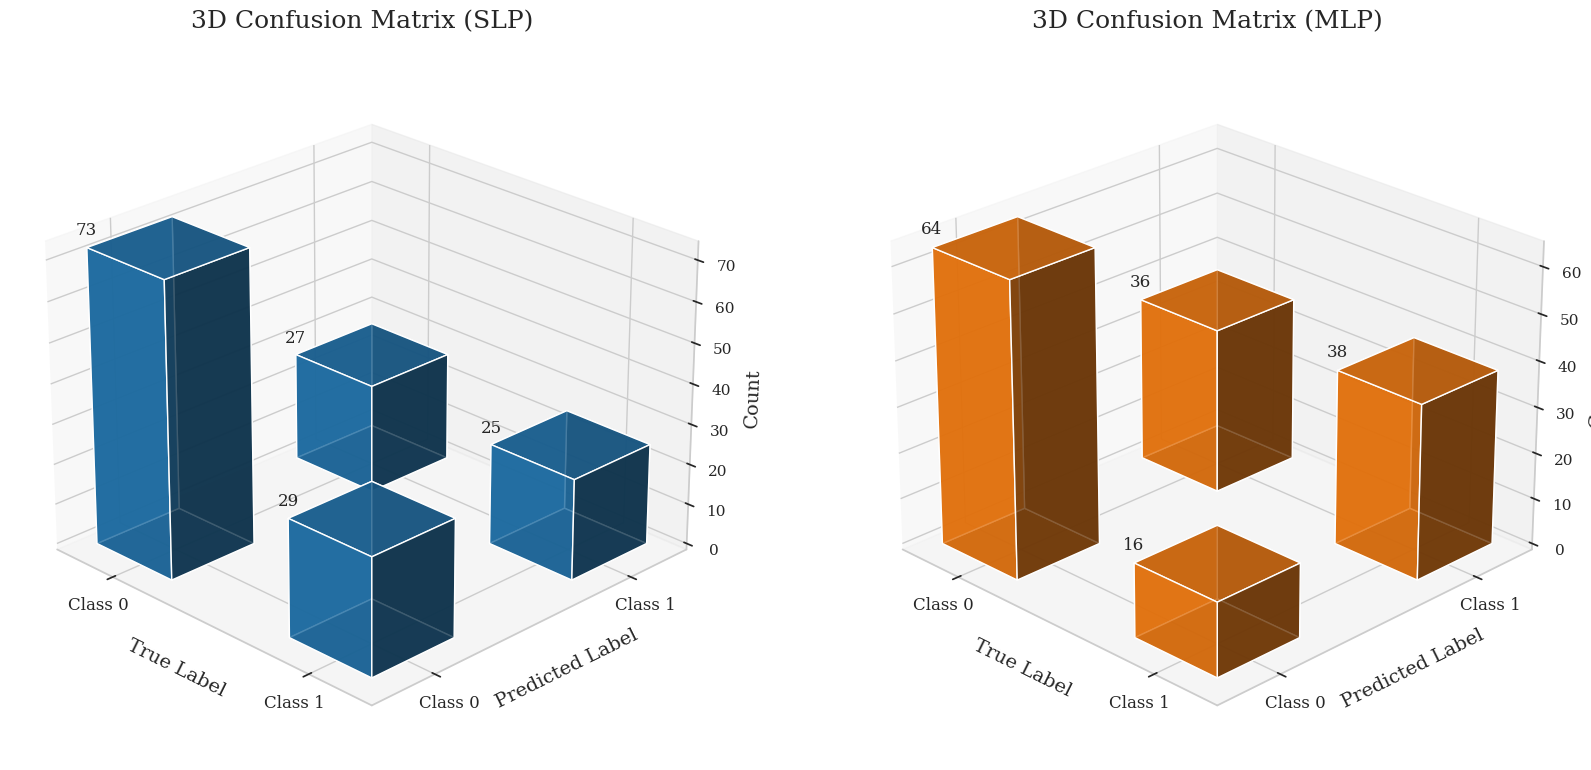

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 14, 'font.family': 'serif'})

slp_metrics = {
    'Class 0 Precision': 0.74 * 100,
    'Class 0 Recall': 0.80 * 100,
    'Class 0 F1-Score': 0.77 * 100,
    'Class 1 Precision': 0.57 * 100,
    'Class 1 Recall': 0.48 * 100,
    'Class 1 F1-Score': 0.52 * 100,
    'Weighted Avg Precision': 0.68 * 100,
    'Weighted Avg Recall': 0.69 * 100,
    'Weighted Avg F1-Score': 0.68 * 100,
}

mlp_metrics = {
    'Class 0 Precision': 0.82 * 100,
    'Class 0 Recall': 0.66 * 100,
    'Class 0 F1-Score': 0.73 * 100,
    'Class 1 Precision': 0.54 * 100,
    'Class 1 Recall': 0.74 * 100,
    'Class 1 F1-Score': 0.62 * 100,
    'Weighted Avg Precision': 0.73 * 100,
    'Weighted Avg Recall': 0.69 * 100,
    'Weighted Avg F1-Score': 0.70 * 100,
}

metrics = [
    'Class 0 Precision', 'Class 0 Recall', 'Class 0 F1-Score',
    'Class 1 Precision', 'Class 1 Recall', 'Class 1 F1-Score',
    'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1-Score'
]


fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(metrics))  
width = 0.3  # Bar width
y_pos_spl = np.zeros(len(metrics))  
y_pos_mlp = np.ones(len(metrics))  

slp_values = [slp_metrics[metric] for metric in metrics]
mlp_values = [mlp_metrics[metric] for metric in metrics]

ax.bar3d(x_pos, y_pos_spl, np.zeros_like(slp_values), width, 0.4, slp_values, color='#4C72B0', alpha=0.9)
ax.bar3d(x_pos, y_pos_mlp, np.zeros_like(mlp_values), width, 0.4, mlp_values, color='#DD8452', alpha=0.9)

for i, v in enumerate(slp_values):
    ax.text(x_pos[i], 0, v + 2, f'{v:.2f}%', color='black', ha='center', va='bottom', fontsize=10, fontweight='bold')
for i, v in enumerate(mlp_values):
    ax.text(x_pos[i], 1, v + 2, f'{v:.2f}%', color='black', ha='center', va='bottom', fontsize=10, fontweight='bold')


ax.set_ylabel('Model', labelpad=20, fontsize=14)
ax.set_zlabel('Percentage (%)', labelpad=10, fontsize=14)
ax.set_yticks([0, 1])
ax.set_yticklabels(['SLP', 'MLP'], fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, fontsize=12, rotation=45, ha='right')

ax.set_title('3D Model Performance Comparison: SLP vs MLP', fontsize=22, pad=40)

ax.view_init(elev=20, azim=-45) 

plt.tight_layout()
plt.show()

cm_slp = np.array([[73, 27], [29, 25]]) 
cm_mlp = np.array([[64, 36], [16, 38]])  


classes = ['Class 0', 'Class 1']


fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121, projection='3d')
x_pos, y_pos = np.meshgrid(np.arange(cm_slp.shape[0]), np.arange(cm_slp.shape[1]), indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = np.zeros_like(x_pos)

dx = dy = 0.4

ax1.bar3d(x_pos, y_pos, z_pos, dx, dy, cm_slp.ravel(), shade=True, color='#1f77b4', alpha=0.8)
ax1.set_title('3D Confusion Matrix (SLP)', fontsize=18, pad=20)

ax1.set_xticks([0.2, 1.2])
ax1.set_xticklabels(classes, fontsize=12)
ax1.set_yticks([0.2, 1.2])
ax1.set_yticklabels(classes, fontsize=12)
ax1.set_xlabel('True Label', fontsize=14)
ax1.set_ylabel('Predicted Label', fontsize=14)
ax1.set_zlabel('Count', fontsize=14)

for i in range(len(x_pos)):
    ax1.text(x_pos[i], y_pos[i], cm_slp.ravel()[i] + 2, f'{cm_slp.ravel()[i]}', ha='center', va='bottom', fontsize=12)

ax2 = fig.add_subplot(122, projection='3d')
x_pos, y_pos = np.meshgrid(np.arange(cm_mlp.shape[0]), np.arange(cm_mlp.shape[1]), indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = np.zeros_like(x_pos)

ax2.bar3d(x_pos, y_pos, z_pos, dx, dy, cm_mlp.ravel(), shade=True, color='#ff7f0e', alpha=0.8)
ax2.set_title('3D Confusion Matrix (MLP)', fontsize=18, pad=20)

ax2.set_xticks([0.2, 1.2])
ax2.set_xticklabels(classes, fontsize=12)
ax2.set_yticks([0.2, 1.2])
ax2.set_yticklabels(classes, fontsize=12)
ax2.set_xlabel('True Label', fontsize=14)
ax2.set_ylabel('Predicted Label', fontsize=14)
ax2.set_zlabel('Count', fontsize=14)

for i in range(len(x_pos)):
    ax2.text(x_pos[i], y_pos[i], cm_mlp.ravel()[i] + 2, f'{cm_mlp.ravel()[i]}', ha='center', va='bottom', fontsize=12)
ax1.view_init(elev=25, azim=-45)
ax2.view_init(elev=25, azim=-45)

plt.tight_layout()
plt.show()

# Discriminative Features

Even if a feature's actual utility can only be determined once it has been integrated with other features in a machine learning technique, knowing how discriminative each feature is on its own is still useful.  Calculating a T-score for each feature—a statistic frequently used in statistics and the LDA machine learning technique—is one popular way to accomplish this.   

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

In [73]:
print("Unique values in 'outcome':", cleaned_df['outcome'].unique())

Unique values in 'outcome': ['No Diabetic' 'Diabetic']


In [74]:
x1 = cleaned_df[cleaned_df['outcome'] == 'No Diabetic']
x2 = cleaned_df[cleaned_df['outcome'] == 'Diabetic']

In [75]:
# Calculate T-score for each feature
features = cleaned_df.columns.drop('outcome')  
t_scores = {}
x1 = cleaned_df[cleaned_df['outcome'] == 'No Diabetic']
x2 = cleaned_df[cleaned_df['outcome'] == 'Diabetic']

for feature in features:
    mean_x1 = x1[feature].mean()
    mean_x2 = x2[feature].mean()
    stddev_x1 = x1[feature].std()
    stddev_x2 = x2[feature].std()
    if np.isnan(stddev_x1) or np.isnan(stddev_x2) or (stddev_x1 + stddev_x2) == 0:
        print(f"Skipping feature {feature} due to zero or NaN standard deviation.")
        continue  
    else:
        denominator = 0.5 * (stddev_x1 + stddev_x2)
        t_score = (mean_x2 - mean_x1) / denominator
        t_scores[feature] = t_score
t_scores_df = pd.DataFrame(list(t_scores.items()), columns=['Feature', 'T-Score'])
t_scores_df['Abs T-Score'] = t_scores_df['T-Score'].abs()
top_features = t_scores_df.sort_values(by='Abs T-Score', ascending=False).head(2)  # Select top 2 features

print("Top features based on T-score:")
print(top_features)


Top features based on T-score:
   Feature   T-Score  Abs T-Score
1  Glucose -1.077032     1.077032
5      BMI -0.648804     0.648804


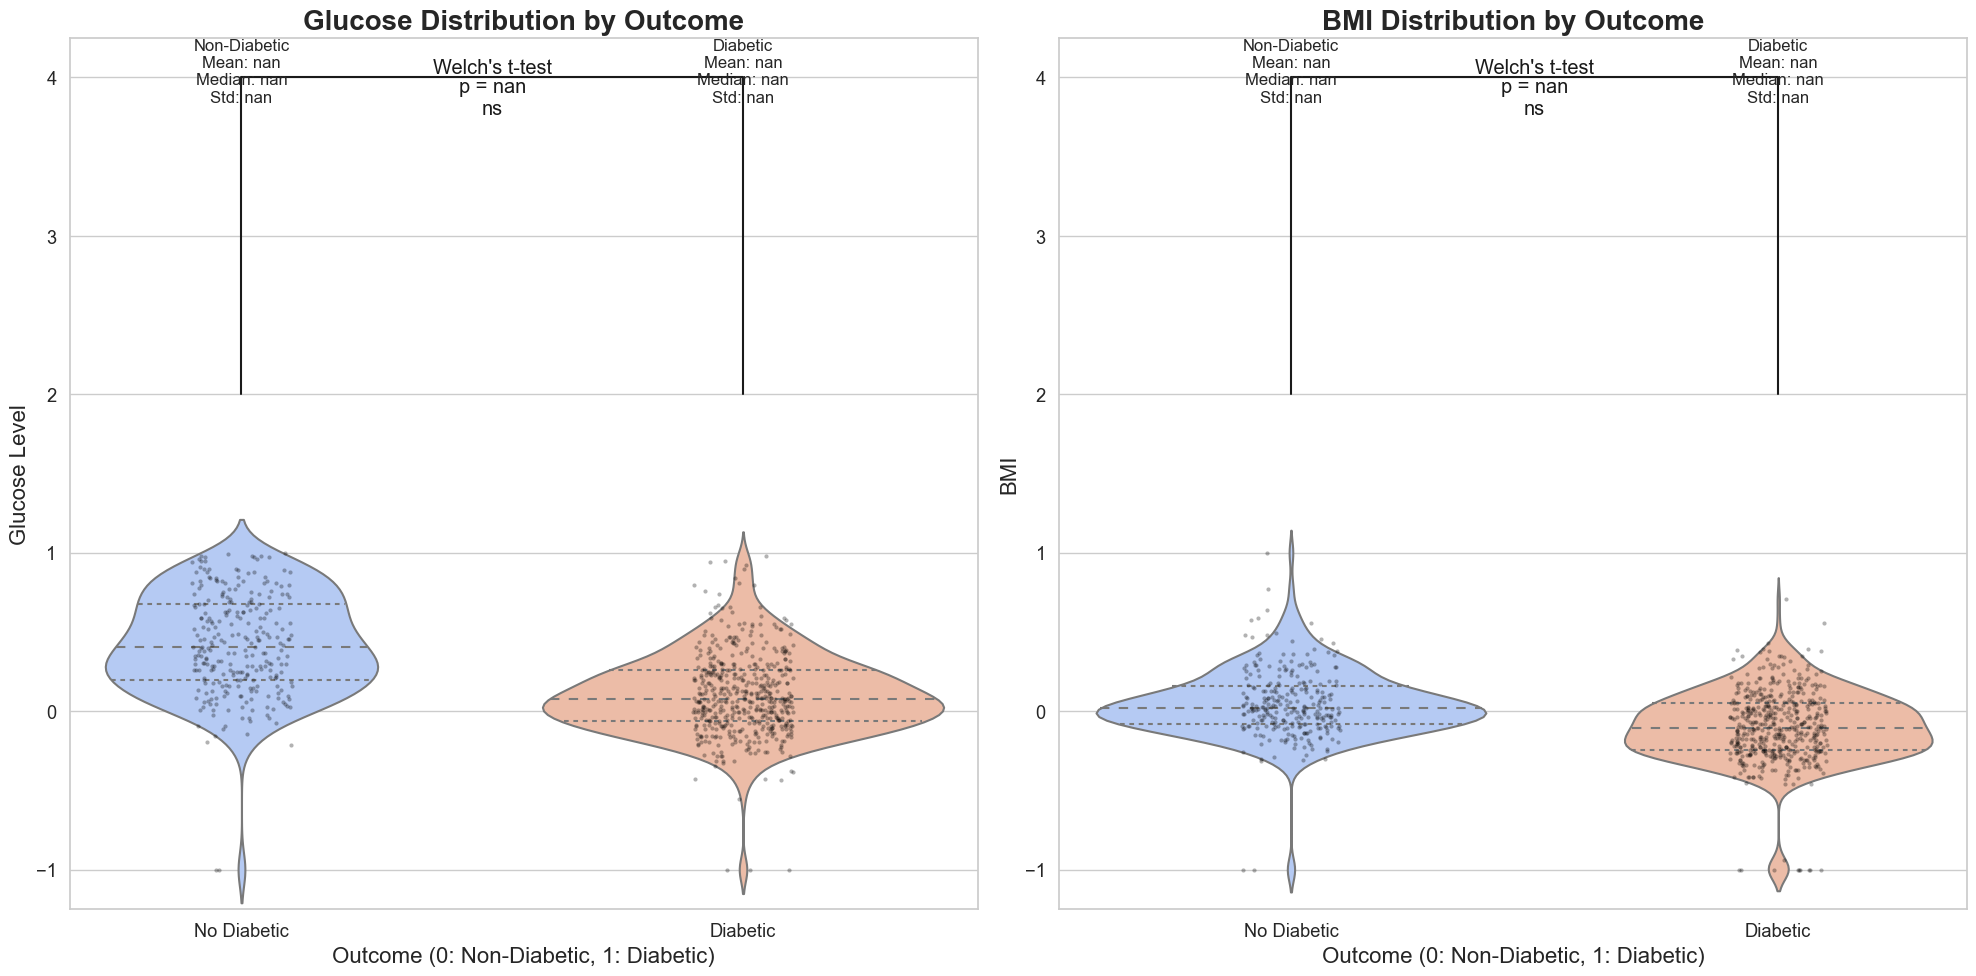

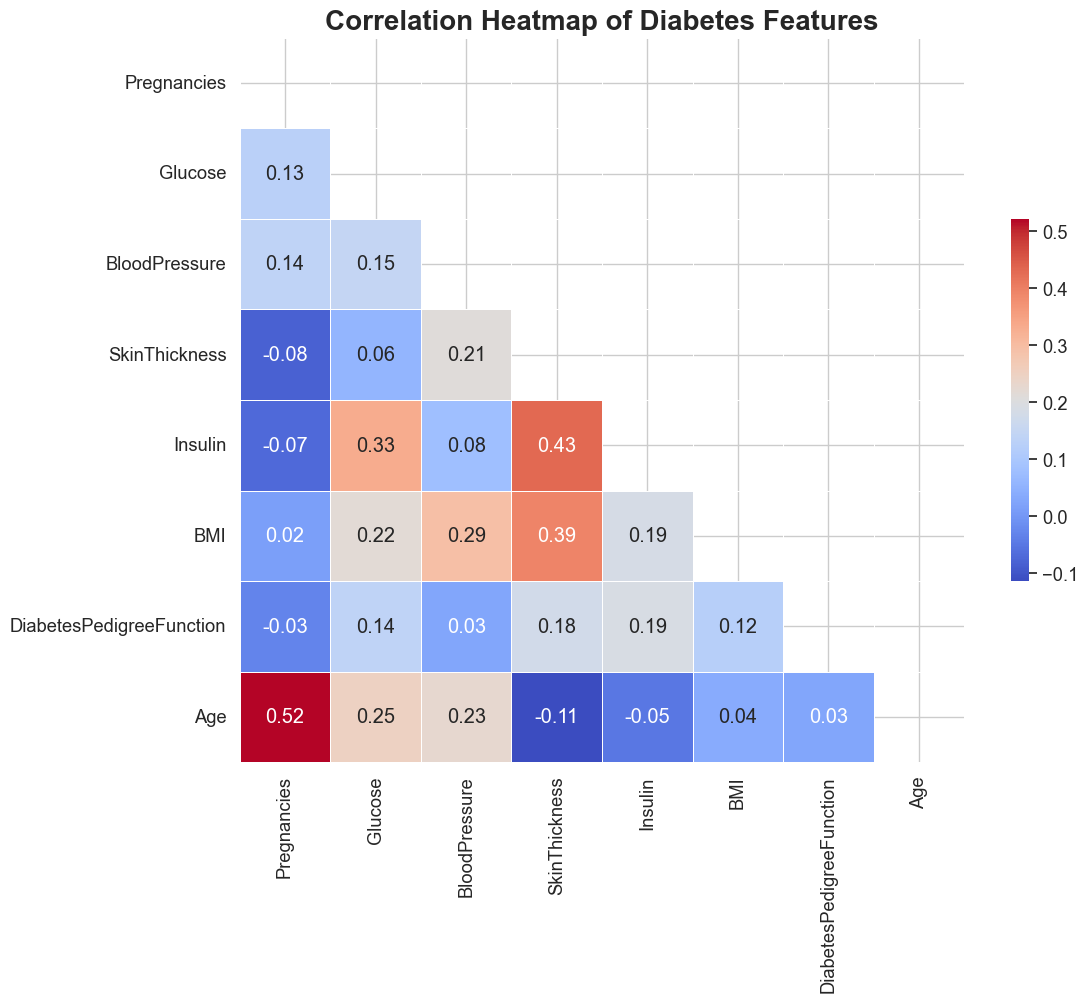

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("coolwarm", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

def add_stat_annotations(ax, data, feature, hue):
    x1, x2 = 0, 1
    y, h, col = data[feature].max() + 1, 2, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, "Welch's t-test", ha='center', va='bottom', color=col)
    
    stat, p = stats.ttest_ind(data[data[hue]==0][feature], data[data[hue]==1][feature], equal_var=False)
    sig_symbol = 'ns'
    if p < 0.001:
        sig_symbol = '***'
    elif p < 0.01:
        sig_symbol = '**'
    elif p < 0.05:
        sig_symbol = '*'
    
    ax.text((x1+x2)*.5, y+h, f"p = {p:.3f}\n{sig_symbol}", ha='center', va='top', color=col)

correct_column_name = 'outcome'

# Violin plot for Glucose vs Outcome
sns.violinplot(x=correct_column_name, y='Glucose', data=cleaned_df, palette=palette, inner='quartile', ax=ax1)
sns.stripplot(x=correct_column_name, y='Glucose', data=cleaned_df, color="black", size=3, alpha=0.3, ax=ax1)
ax1.set_title('Glucose Distribution by Outcome', fontsize=20, weight='bold')
ax1.set_xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)', fontsize=16)
ax1.set_ylabel('Glucose Level', fontsize=16)
add_stat_annotations(ax1, cleaned_df, 'Glucose', correct_column_name)

# Violin plot for BMI vs Outcome
sns.violinplot(x=correct_column_name, y='BMI', data=cleaned_df, palette=palette, inner='quartile', ax=ax2)
sns.stripplot(x=correct_column_name, y='BMI', data=cleaned_df, color="black", size=3, alpha=0.3, ax=ax2)
ax2.set_title('BMI Distribution by Outcome', fontsize=20, weight='bold')
ax2.set_xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)', fontsize=16)
ax2.set_ylabel('BMI', fontsize=16)
add_stat_annotations(ax2, cleaned_df, 'BMI', correct_column_name)

# Add descriptive statistics
for ax, feature in zip([ax1, ax2], ['Glucose', 'BMI']):
    for i, outcome in enumerate(['Non-Diabetic', 'Diabetic']):
        stats_text = cleaned_df[cleaned_df[correct_column_name] == i][feature].describe()
        stats_text = f"{outcome}\nMean: {stats_text['mean']:.2f}\nMedian: {stats_text['50%']:.2f}\nStd: {stats_text['std']:.2f}"
        ax.text(i, ax.get_ylim()[1], stats_text, horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.savefig('enhanced_diabetes_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
corr = cleaned_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Diabetes Features', fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig('diabetes_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 2 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Define the make_meshgrid function
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Define the plot_contours function with probability levels
def plot_contours(ax, model, xx, yy, **params):
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])  
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap=cm.coolwarm, alpha=0.6)
    return out

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cleaned_df['outcome_encoded'] = encoder.fit_transform(cleaned_df['outcome'])

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.54      0.59        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



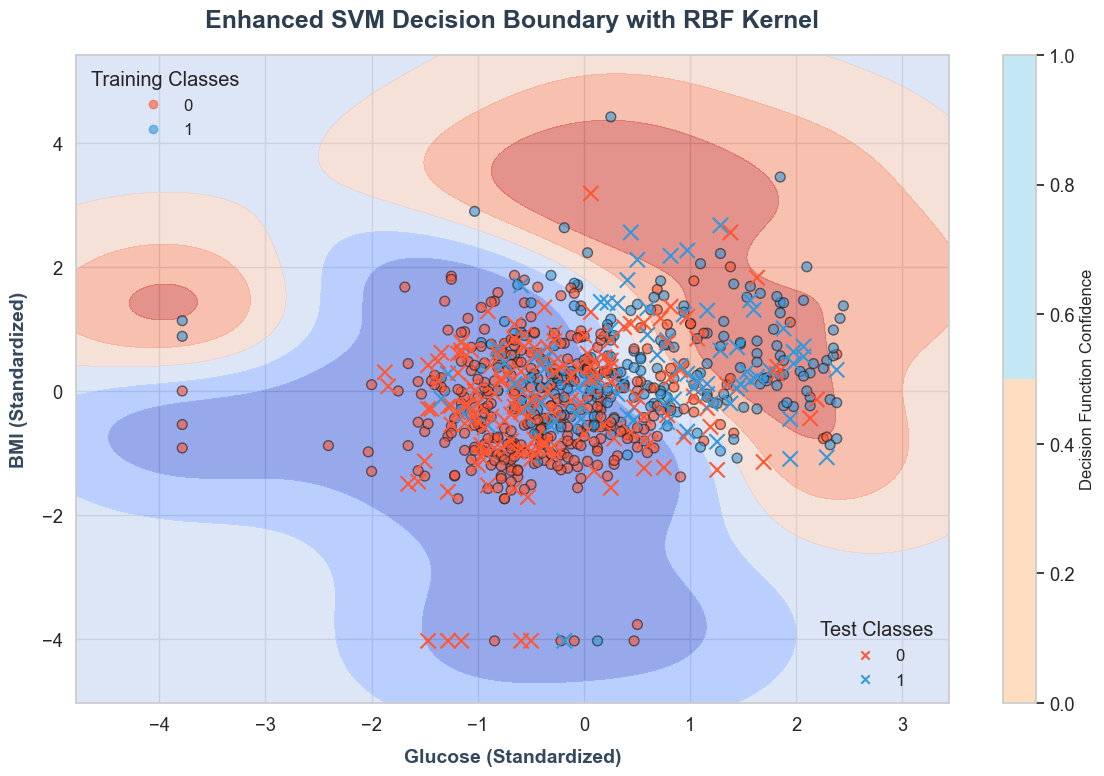

In [79]:
scaler = StandardScaler()
X = scaler.fit_transform(cleaned_df[['Glucose', 'BMI']].values)
y = cleaned_df['outcome_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make a meshgrid in order to plot decision boundaries.
xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])

# Plot choice limits with more sophisticated design
fig, ax = plt.subplots(figsize=(12, 8))
plot_contours(ax, svm_model, xx, yy, cmap=ListedColormap(['#FFDDC1', '#C3E8F4']), alpha=0.8)

# Plot test and training data points using a better layout.
scatter_train = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#FF5733', '#3498DB']), 
                           s=50, edgecolor='k', alpha=0.6, label='Training Data')
scatter_test = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['#FF5733', '#3498DB']),
                          s=120, marker='x', edgecolor='k', label='Test Data')

ax.set_xlabel('Glucose (Standardized)', fontsize=14, labelpad=10, weight='bold', color='#34495E')
ax.set_ylabel('BMI (Standardized)', fontsize=14, labelpad=10, weight='bold', color='#34495E')
ax.set_title('Enhanced SVM Decision Boundary with RBF Kernel', fontsize=18, weight='bold', pad=20, color='#2C3E50')

# Add custom legend 
legend_train = ax.legend(*scatter_train.legend_elements(), title="Training Classes", loc="upper left", fontsize=12)
legend_test = ax.legend(*scatter_test.legend_elements(), title="Test Classes", loc="lower right", fontsize=12)
ax.add_artist(legend_train)  

# Contextualize decision confidence levels with contour labels.
cbar = fig.colorbar(cm.ScalarMappable(cmap=ListedColormap(['#FFDDC1', '#C3E8F4'])), ax=ax)
cbar.set_label('Decision Function Confidence', fontsize=12)

# Analyse the performance of the model.
y_pred = svm_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.tight_layout()
plt.show()